# **`SUPERMARKET CUSTOMERS DATA ANALYSIS`**

**by ALIF WAHYU SYAHNANDA**

# **Pendahuluan**

## **Latar Belakang**

Di era pasar industri retail yang sangat dinamis saat ini terdapat keanekaragaman proses pasar dan jual beli yang cukup tidak menentu. Mungkin salah satunya pada industri retail supermarket. Kebutuhan pokok menjadi yang utama dari yang lain untuk memenuhi asupan dan gizi masyarakat. Dengan adanya supermarket cukup memberikan kemudahan dalam mengakses kebutuhan pokok yang dibutuhkan sehari-hari untuk menunjang seluruh aspek perputaran industri dan pasar. Di era yang cukup mengalami perkembangan yang pesat dalam sisi ekonomi, pendidikan, budaya hingga teknologi, justru kebutuhan mendasar sangat menjadi prioritas untuk masyarakat.

Dengan tingginya kebutuhan dan kepentingan dasar tersebut, supermarket adalah pilihan pertama untuk tempat dimana masyarakat mengkases dan mendapatkan suplai kebutuhan sehari-hari. Namun hal tersebut juga harus ditunjang dengan kemampuan dan keterjangkauan dari perusahaan supermarket itu sendiri. Karena masyarakat kian hari memiliki komparasi dan preferensi yang cukup dinamis. Seperti bagaimana mereka dan dimana mereka ingin menggunakan supermarket pilihannya menjadi supplier kebutuhan pokok sehari-hari mereka.

Maka dari itu, perusahaan supermarket perlu menjaga pelayanan yang prima, meningkatkan produk, mengembangkan tawaran-tawaran menarik dan juga melihat kebiasaan dari pelanggan agar masyarakat yang menjadi pelanggan setia tetap percaya serta masyarakat yang menjadi pelanggan baru semakin senang dan puas berbelanja di supermarket pilihannya. Salah satu cara perusahaan dapat melakukannya yaitu dengan melakukan analisa data pelanggan supermarket yang dimiliki. Harapannya dapat membantu perusahaan mengetahui pelanggan mana yang perlu dijaga, ditingkatkan, dan dirayu untuk tetap konsisten berbelanja di supermarket.

## **Rumusan Masalah**

Rumusan masalah yang dibahas dalam proses analisis ini digunakan agar analisa dapat terarah dan fokus sehingga didapatkan hasil sesuai yang diharapkan. Rumusan masalah analisis ini adalah sebagai berikut:

1. Bagaimana segmentasi pelanggan berdasarkan kebiasaan mereka melakukan pembelian (recency), frekuensi, dan keuangan (monetary)? (Metode RFM)
2. Dimana saluran transaksi paling banyak pelanggan supermarket sering melakukan pembelian kebutuhan mereka?
3. Produk apa yang paling diminati untuk kebutuhan mereka?
4. Apakah promosi yang sudah dilakukan efektif ?

## **Batasan Masalah**

* Menggunakan data pelanggan supermarket dari Juli 2012 hingga Juni 2014
* Perhitungan usia dari tahun terakhir pelanggan bergabung menjadi anggota/member supermarket
* Data penunjang ditambahkan dari referensi internet

## **Data Source**

Sumber data yang digunakan analisa dan menjawab rumusan masalah diatas bisa diakses dan download [disini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK?usp=sharing). Data merupakan data mentah atau asli sebelum dilakukan penanganan serta perubahan.

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

# **Data Understanding**

Pada tahap yang pertama ini mari kita memahami dan melihat data yang akan kita lakukan analisa secara lebih detail. Pemahaman data ini diperlukan karena kita ingin mengetahui informasi numerik dan kategorik serta beberapa tipe data hingga nilai yang hilang pada tiap kolom/data yang disajikan. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [2]:
# Membaca dataframe
df = pd.read_csv('Supermarket Customers.csv',delimiter='\t')
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

**Pustaka Penjelasan Kolom Data *Supermarket Customers***

| Category          | Field               | Description                                                             |
|-------------------|---------------------|----------------------------------------------------------               |
| **People**        | ID                  | Customer's unique identifier                                            |
|                   | Year_Birth          | Customer's birth year                                                   |
|                   | Education           | Customer's education level                                              |
|                   | Marital_Status      | Customer's marital status                                               |
|                   | Income              | Customer's yearly household income (Dollar)                             |
|                   | Kidhome             | Number of children in customer's household                              |
|                   | Teenhome            | Number of teenagers in customer's household                             |
|                   | Dt_Customer         | Date of customer's enrollment with the company                          |
|                   | Recency             | Number of days since customer's last purchase (Days)                    |
|                   | Complain            | 1 if the customer complained in the last 2 years, 0 otherwise           |
|-------------------|---------------------|----------------------------------------------------------               |
| **Products**      | MntWines            | Amount spent on wine in the last 2 years (Dollar)                       |
|                   | MntFruits           | Amount spent on fruits in the last 2 years (Dollar)                     |
|                   | MntMeatProducts     | Amount spent on meat in the last 2 years (Dollar)                       |
|                   | MntFishProducts     | Amount spent on fish in the last 2 years (Dollar)                       |
|                   | MntSweetProducts    | Amount spent on sweets in the last 2 years (Dollar)                     |
|                   | MntGoldProds        | Amount spent on gold in the last 2 years (Dollar)                       |
|-------------------|---------------------|----------------------------------------------------------               |
| **Promotion**     | NumDealsPurchases   | Number of purchases made with a discount                                |
|                   | AcceptedCmp1        | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise   |
|                   | AcceptedCmp2        | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise   |
|                   | AcceptedCmp3        | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise   |
|                   | AcceptedCmp4        | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise   |
|                   | AcceptedCmp5        | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise   |
|                   | Response            | 1 if the customer accepted the offer in the last campaign, 0 otherwise  |
|-------------------|---------------------|----------------------------------------------------------               |
| **Place**         | NumWebPurchases     | Number of purchases made through the company’s website                  |
|                   | NumCatalogPurchases | Number of purchases made using a catalog                                |
|                   | NumStorePurchases   | Number of purchases made directly in stores                             |
|                   | NumWebVisitsMonth    | Number of visits to the company’s website in the last month            |

### **Data Types dan Cek Informasi Awal**

**Informasi Detail Data**

Lihat masing-masing tipe data kolom serta null value, unique value untuk tiap variable/tiap kolom. Tujuan dari proses ini adalah untuk melihat kesesuaian antara data dengan tipe data serta mendapatkan anomali gambaran awal yang perlu dilakukan penanganan.

In [3]:
# Cek data type, null value (missing value), unique value untuk tiap variable/tiap kolom
pd.set_option('display.max_colwidth', None)
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'Column Name': df.columns.values,
    'Data Type': df.dtypes.values,
    'Number of Unique': df.nunique().values,
    'Unique Sample': [df[col].unique() for col in df.columns]
    }
)

Total rows 2240, Total Colum 29


Column Name Data Type  Number of Unique  \
0                    ID     int64              2240   
1            Year_Birth     int64                59   
2             Education    object                 5   
3        Marital_Status    object                 8   
4                Income   float64              1974   
5               Kidhome     int64                 3   
6              Teenhome     int64                 3   
7           Dt_Customer    object               663   
8               Recency     int64               100   
9              MntWines     int64               776   
10            MntFruits     int64               158   
11      MntMeatProducts     int64               558   
12      MntFishProducts     int64               182   
13     MntSweetProducts     int64               177   
14         MntGoldProds     int64               213   
15    NumDealsPurchases     int64                15   
16      NumWebPurchases     int64                15   
17  NumCatalogPurchases     int64                14   
18    NumStorePurchases     int64                14   
19    NumWebVisitsMonth     int64                16   
20         AcceptedCmp3     int64                 2   
21         AcceptedCmp4     int64                 2   
22         AcceptedCmp5     int64                 2   
23         AcceptedCmp1     int64                 2   
24         AcceptedCmp2     int64                 2   
25             Complain     int64                 2   
26        Z_CostContact     int64                 1   
27            Z_Revenue     int64                 1   
28             Response     int64                 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 

In [4]:
# Cek apakah ada data pada "ID" yang bernilai 0
df.loc[df['ID'] == 0]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
214   0        1985  Graduation        Married  70951.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
214  04-05-2013       66       239         10              554   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
214              254                87            54                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
214                3                    4                  9   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
214                  1             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
214             0             0         0              3         11         0

**Penjelasan**

* Semua pelanggan memiliki ID unik masing-masing (Jumlah Pelanggan = Jumlah Unik di Kolom **ID**)

Berdasarkan data diatas terdapat beberapa hal yang perlu dilakukan perapihan data dan pembersihan data pada beberapa kolom, untuk meningkatkan relevansi data dan keakuratan data yang nantinya akan dilakukan analisis, maka dibawah ini kolom yang perlu ditindak lanjuti di dalam proses *Data Cleaning* :

* Tipe data kolom **Dt_Customer** masih dalam bentuk object harus diubah menjadi datetime. Karena kolom "Dt_Customer" berisi tanggal registrasi pelanggan, maka format tipe datanya adalah tanggal waktu *(datetime)*

* Pada kolom **ID** ada 1 yang memiliki nilai 0 hal tersebut nantinya akan diubah dengan random nilai agar membantu analsis lebih relevan dan real

*  Pada kolom **Marital_Status**, didapati beberapa istilah seperti "Absurd" dan "YOLO" yang tidak relevan pengartiannya dan tidak sesuai dengan klasifikasi status perkawinan. Namun, kita dapat mengasumsikan bahwa individu yang mengisi status perkawinan ini sebenarnya masih Single karena jika mereka memiliki pasangan, mereka dapat menggunakan "Together" (akan diganti dengan "Cohabitation" [referensi](https://en.wikipedia.org/wiki/Cohabitation)) atau "Married". Selain itu, status "Single" dan "Alone" pada dasarnya memiliki arti yang sama, seperti halnya "Divorced" dan "Widow", keduanya mengindikasikan perpisahan. Untuk menyederhanakan analisis dan lebih relevan, kolom baru **"Marital_Status"** akan dibuat, yang hanya terdiri dari **"Single", "Cohabitation", "Married", dan "Divorced"** 

* Pada kolom **Education**, terdapat nilai "2n Cycle" yang menurut salah satu [sumber referensi](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles.) berarti gelar Master. Selain itu, pendidikan "Basic" mengacu pada individu yang hanya menyelesaikan pendidikan hingga sekolah menengah atas (SMA) atau memiliki pendidikan informal dan tidak melaksanakan perguruan tinggi menurut [definisi pendidikan dasar](https://uis.unesco.org/en/glossary-term/basic-education). Oleh karena itu, kami akan mengubah isi kolom 'Education', di mana "2n Cycle" akan dikelompokkan sebagai "Master", dan "Basic" akan diidentifikasi sebagai "Non-degree" menurut [referensi](https://dictionary.cambridge.org/dictionary/english/non-graduate). Selain itu, tingkat pendidikan "Graduation" akan diganti dengan "Bachelor" untuk menghindari definisi yang kurang relevan


### **Missing Values**

Pada bagian ini akan dilakukan pencarian missing value menggunakan library missingno

In [5]:
missingno.matrix(df)

<Axes: >

In [6]:
# Menunjukkan semua data pada kolom Income yang missing value
df[df['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [7]:
# Menunjukkan total hdata NA value/ missing value pada tiap kolom
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

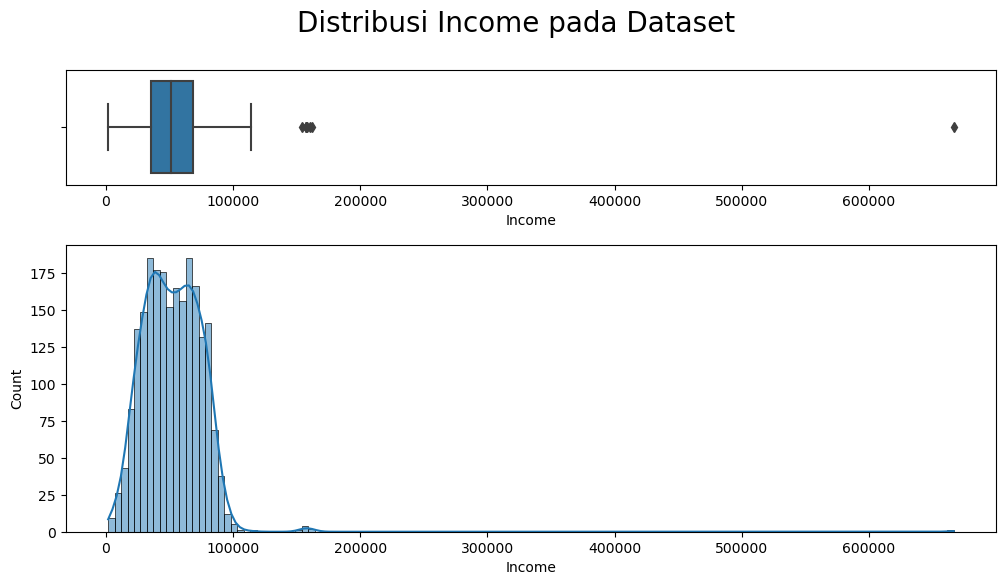

In [9]:
# Melihat distribusi data Income yang dinyatakan memiliki missing value
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3} 

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Income',ax=axes1)
sns.histplot(data=df, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

Penjelasan 

* Terdapat  nilai yang hilang (n/a)/Null value/missing value terdapat pada kolom 'Income' sejumlah 24 data, hal ini akan dilakukan penanganan. **Nilai yang hilang akan ditangani di bagian selanjutnya yaitu Pembersihan Data *(Data Cleaning)***

Ada 2 cara untuk menangani *missing value*:
* **Pertama**, menghapus baris/kolom yang berisi *missing value*. Cara ini mungkin bisa dilakukan karena persentase nilai missing value yakni 1% dibawah 5% menurut sumber: [UPEI Library](https://pressbooks.library.upei.ca/montelpare/chapter/working-with-missing-data/#:~:text=Generally%2C%20if%20less%20than%205,to%20ignore%20them%20(REF)).
* **Kedua**, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, cara yang paling baik bila jumlah data missing value diatas 5% maka dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara *domain knowledge* atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. **Menghapus data akan menjadi opsi terakhir**.

### **Duplicate Values**

In [10]:
# Cek duplikat data
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

Dapat dilihat pada pengecekan duplikat data didapati 0 rows maka pada tersebut tidak ada duplikasi data.

# **Exploratory Data Analysis (EDA)  Part.1**

### **Numerik**

Sebelum dilakukannya data cleaning, maka cek terlebih dahulu terkait distribusi data numerik 

In [11]:
# Memilih hanya data berisikan numerikal
numerik = df.select_dtypes(include='number')
pd.set_option('display.max_columns', None)
numerik

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0      5524        1957  58138.0        0         0       58       635   
1      2174        1954  46344.0        1         1       38        11   
2      4141        1965  71613.0        0         0       26       426   
3      6182        1984  26646.0        1         0       26        11   
4      5324        1981  58293.0        1         0       94       173   
...     ...         ...      ...      ...       ...      ...       ...   
2235  10870        1967  61223.0        0         1       46       709   
2236   4001        1946  64014.0        2         1       56       406   
2237   7270        1981  56981.0        0         0       91       908   
2238   8235        1956  69245.0        0         1        8       428   
2239   9405        1954  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0        

#### Statistik Deskriptif Data Numerik

In [12]:
pd.set_option('display.max_columns', None)
display(numerik.describe())

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [13]:
numerik.dtypes

ID                       int64
Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

#### Distribusi Data Numerik

In [14]:
# Cek distribusi data numerik menggunakan histogram
fig = plt.figure(figsize=(20,100)) 

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() 
plt.show()

Penjabaran Data Numerik

Ada beberapa hal terkait distribusi data numerik yang dapat kita deskripsikan dalam beberapa poin : 
* Ada 26 kolom data yang memiliki komposisi data yang keseluruhannya yaitu numerik
* Terdapat 2240 pelanggan yang terdaftar pada data pelanggan ini yang dapat kita temukan pada count pada kolom "ID"
* Pelanggan yang terdaftar juga memiliki sebaran umur yang cukup berentang, dengan umur max (paling muda) = memiliki kelahiran 1996 dan umur min (paling tua) = memiliki kelahiran 1893. Pada tahun kelahiran ini perlu kita explisit kan dan disesuaikan menjadi umur yang sesuai dengan waktu saat pendaftaran terbaru dengan menambahkan kolom baru nantinya yaitu 'Age'
* Dari hasil histogram yang dapat dicermati, untuk hampir keseluruhan data numerik dapat dikategorikan data tidak normal dikarenakan hampir keseluruhan memiliki skew (buntut), selain itu data pada kolom "ID" dan "Recency" merupakan data diskrit bukan continous. Namun akan dilakukan uji statistika normalitas distribusi data agar lebih akurat dalam menentukan data normal dan tidaknya
* Pada kolom Z_CostContact dan Z_Revenue memiliki distribusi data simeteris yang akan di validasi kembali pada proses korelasi (heatmap) dan boxplot untuk menentukan apakah kolom tersebut mempengaruhi proses analisis atau bisa dilakukan penghapusan kolom

#### Outliers

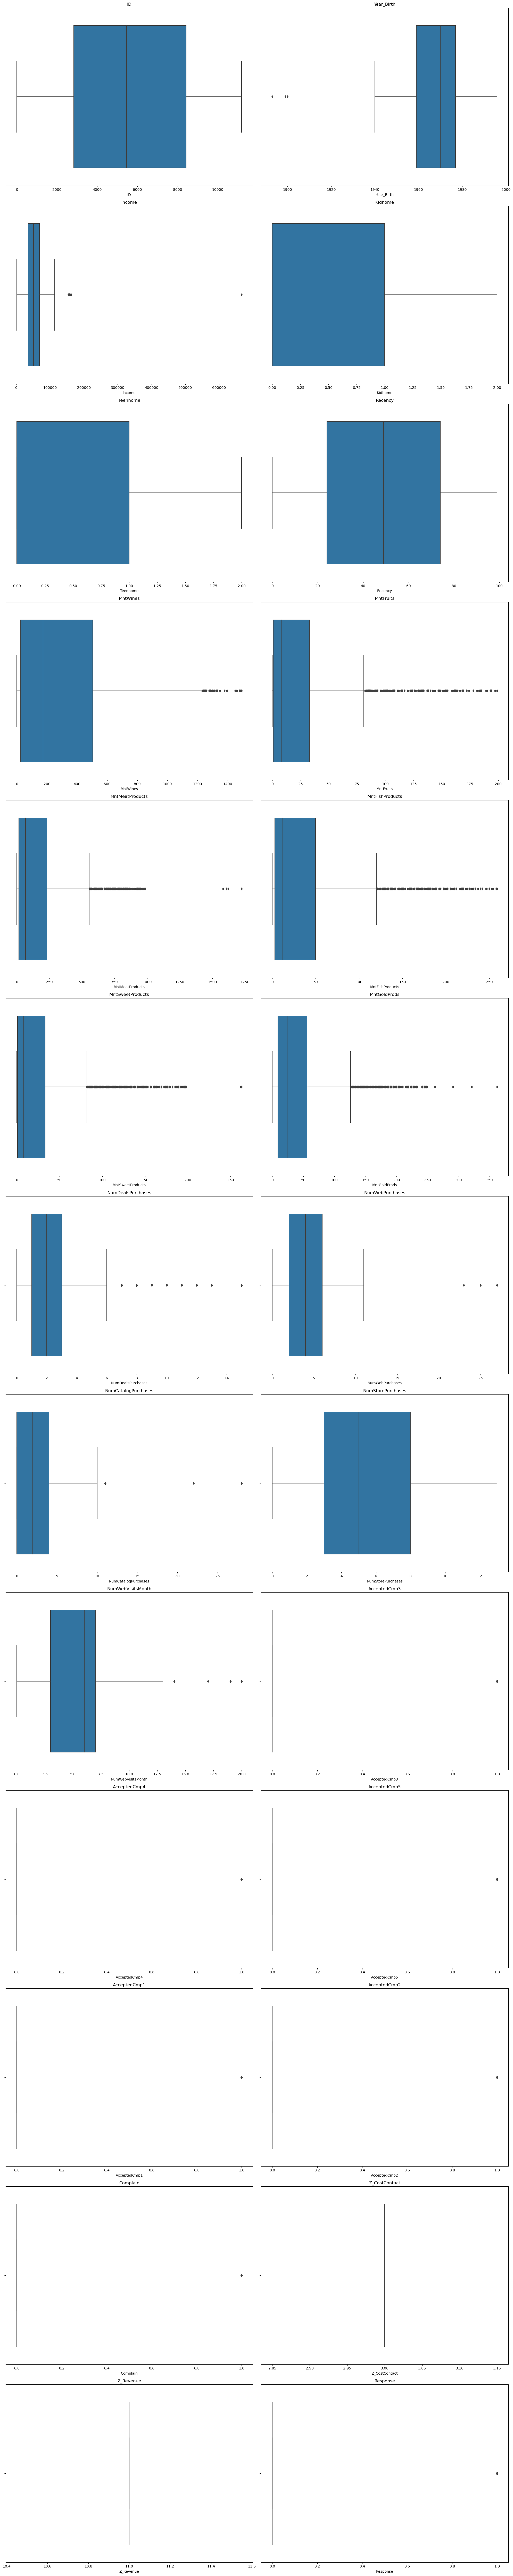

In [15]:
# Cek menggunakan boxplot untuk melihat outliers pada seluruh kolom numerik

fig = plt.figure(figsize=(20,100))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout()
    plt.title(f'{kolom}')
plt.show()

Inter Quartil Range (IQR)

In [16]:
# Menggunakan IQR untuk mendapatkan jumlah outliers

for kolom in numerik.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'{kolom} memiliki outliers {jumlah_outliers}')

ID memiliki outliers 0
Year_Birth memiliki outliers 3
Income memiliki outliers 8
Kidhome memiliki outliers 0
Teenhome memiliki outliers 0
Recency memiliki outliers 0
MntWines memiliki outliers 35
MntFruits memiliki outliers 227
MntMeatProducts memiliki outliers 175
MntFishProducts memiliki outliers 223
MntSweetProducts memiliki outliers 248
MntGoldProds memiliki outliers 207
NumDealsPurchases memiliki outliers 86
NumWebPurchases memiliki outliers 4
NumCatalogPurchases memiliki outliers 23
NumStorePurchases memiliki outliers 0
NumWebVisitsMonth memiliki outliers 8
AcceptedCmp3 memiliki outliers 163
AcceptedCmp4 memiliki outliers 167
AcceptedCmp5 memiliki outliers 163
AcceptedCmp1 memiliki outliers 144
AcceptedCmp2 memiliki outliers 30
Complain memiliki outliers 21
Z_CostContact memiliki outliers 0
Z_Revenue memiliki outliers 0
Response memiliki outliers 334


Hasil pengecekan outliers yang didapatkan dari grafik Boxplot dan IQR ada beberapa hal yang dapat menjadi bahasan yakni :
* Outliers pada masing - masing variabel/kolom yang muncul tidak serta merta akan dilakukan penghapusan
* Pada variabel Income dan Year_Birth memiliki outliers yang cukup masuk akal bila dilakukan penghapusan, namun harus dilihat kembali apakah outliers tersebut bila dihapus semua akan mengurangi insight dari analisis data nantinya
* Kolom untuk setiap produk memiliki jumlah pencilan kanan yang signifikan. Hal ini dikarenakan beberapa pelanggan sangat menyukai produk tertentu, sehingga mereka membelinya dalam jumlah yang jauh lebih besar daripada rata-rata orang pada umumnya.

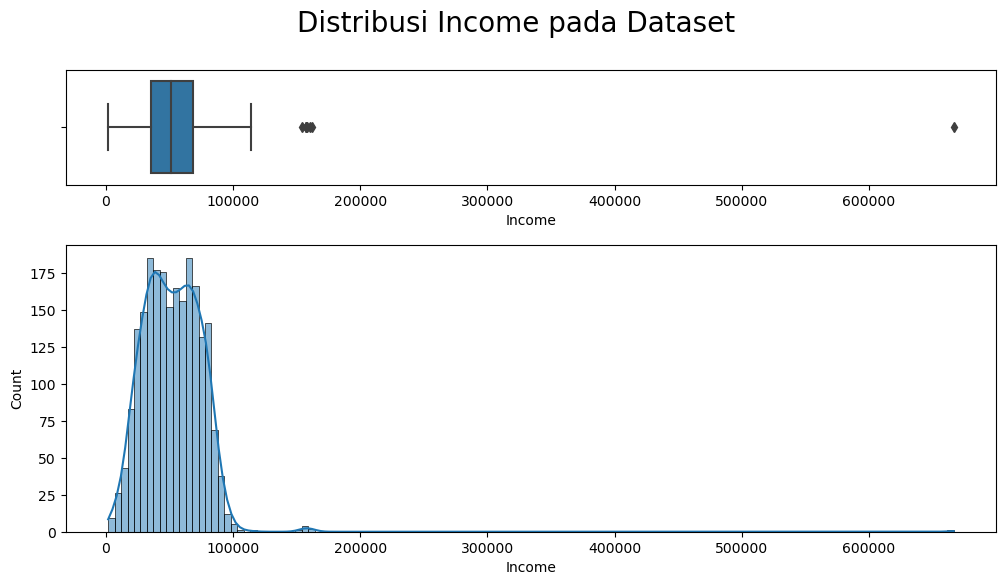

In [17]:
# Melihat distribusi data Income kembali yang dinyatakan memiliki outliers
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3} 

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Income',ax=axes1)
sns.histplot(data=df, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

Text(0.5, 0.98, 'Distribusi Year_Birth pada Dataset')

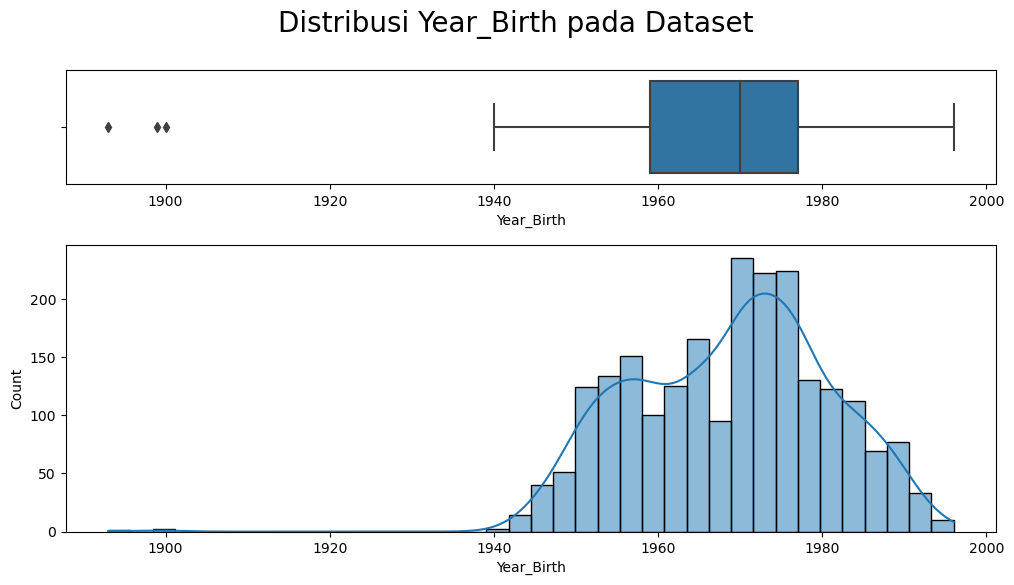

In [18]:
# Melihat distribusi data Year_Birth yang dinyatakan memiliki outliers
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3} 

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Year_Birth',ax=axes1)
sns.histplot(data=df, x='Year_Birth', ax=axes2,kde=True)

fig.suptitle('Distribusi Year_Birth pada Dataset', size = 20)

#### Uji Normalitas Data Numerik

Dalam uji normalitas distribusi data tidak bisa dilakukan bila ada missing value, maka dilakukan drop missing value terlebih dahulu

In [19]:
numerik.isna().sum()

ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [20]:
# Sementara dilakukan drop missing value karena untuk menguji normalitas disaat data belum bersih
numerik.dropna(inplace = True)
numerik.isna().sum()

ID                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Karena data hanya memiliki 2239 baris (<5000 baris), uji Shapiro-Wilk akan digunakan untuk uji normalitas karena lebih akurat dalam kasus ini. [referensi](https://stats.stackexchange.com/questions/446262/can-a-sample-larger-than-5-000-data-points-be-tested-for-normality-using-shapiro)

In [21]:

stat, pvalue = shapiro(numerik['Income'])
pvalue

0.0

In [22]:
# Shapiro Wilk

stat, pvalue = shapiro(numerik['Income'])

if pvalue <= 0.05:
  print('Distribusi Data tidak normal')
else:
  print('Distribusi Data normal')

Distribusi Data tidak normal


In [23]:
listpvalue = []
listStatusNormal = []
listKolom = ['Income','Year_Birth','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']
for i in listKolom :
    stat,pvalue=shapiro(numerik[i])
    if pvalue<=0.05:
        status = 'Distribusi Data Tidak Normal'
    else: 
        status = 'Distribusi Data Normal' 
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [24]:
Normalitas = pd.DataFrame({
    'Column Name' : listKolom,
    'Pvalue' : listpvalue,
    'Status Normalitas' : listStatusNormal
})
Normalitas

Column Name        Pvalue             Status Normalitas
0                Income  0.000000e+00  Distribusi Data Tidak Normal
1            Year_Birth  4.838786e-19  Distribusi Data Tidak Normal
2               Recency  8.739419e-26  Distribusi Data Tidak Normal
3              MntWines  1.000527e-42  Distribusi Data Tidak Normal
4             MntFruits  0.000000e+00  Distribusi Data Tidak Normal
5       MntMeatProducts  0.000000e+00  Distribusi Data Tidak Normal
6       MntFishProducts  0.000000e+00  Distribusi Data Tidak Normal
7      MntSweetProducts  0.000000e+00  Distribusi Data Tidak Normal
8          MntGoldProds  0.000000e+00  Distribusi Data Tidak Normal
9     NumDealsPurchases  0.000000e+00  Distribusi Data Tidak Normal
10      NumWebPurchases  1.473010e-34  Distribusi Data Tidak Normal
11  NumCatalogPurchases  8.407791e-45  Distribusi Data Tidak Normal
12    NumStorePurchases  3.306772e-35  Distribusi Data Tidak Normal
13    NumWebVisitsMonth  4.598450e-31  Distribusi Data Tidak Normal
14             Complain  0.000000e+00  Distribusi Data Tidak Normal

Hasil yang didapat setelah dilakukan uji normalitas distribusi yakni Distribusi Data Tidak Normal dikarenakan nilai pvalue < 0.05 . Maka selanjutnya dilakukan pengecekan korelasi tiap variabel menggunakan metode .corr dan menggunakan visualisasi heatmap agar lebih jelas

#### Korelasi

Pada pengecekan korelasi antar variabel/kolom ini berdasarkan karakter data dan distribusi data, dengan hasil deskriptif distribusi data sebelumnya. Data yang dimiliki cukup variatif pada variabelnya dan juga memiliki outliers. Maka untuk metode korelasi sendiri akan menggunakan **metode spearman**

In [25]:
# Jika data ada outliers nya dan skala nya beda gunakan korelasi spearman
numerik.corr(method = 'spearman')

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.005013  0.004250  0.000691 -0.003798   
Year_Birth           0.005013    1.000000 -0.217063  0.261818 -0.383419   
Income               0.004250   -0.217063  1.000000 -0.559909  0.045909   
Kidhome              0.000691    0.261818 -0.559909  1.000000 -0.049211   
Teenhome            -0.003798   -0.383419  0.045909 -0.049211  1.000000   
Recency             -0.043935   -0.017089  0.007938  0.009111  0.007451   
MntWines            -0.024931   -0.234700  0.830056 -0.580712  0.110354   
MntFruits           -0.020197   -0.025921  0.582379 -0.452910 -0.202097   
MntMeatProducts     -0.013629   -0.113229  0.816815 -0.551080 -0.128053   
MntFishProducts     -0.029754   -0.029839  0.577392 -0.453811 -0.232618   
MntSweetProducts    -0.032802    0.002081  0.567087 -0.442766 -0.199683   
MntGoldProds        -0.041191   -0.076264  0.505550 -0.426330 -0.022539   
NumDealsPurchases   -0.026909   -0.084992 -0.195533  0.260342  0.480238   
NumWebPurchases     -0.024618   -0.166134  0.573262 -0.423273  0.147145   
NumCatalogPurchases -0.011334   -0.178542  0.791841 -0.598966 -0.046041   
NumStorePurchases   -0.021991   -0.166814  0.731752 -0.557366  0.076381   
NumWebVisitsMonth   -0.011906    0.134087 -0.643667  0.481408  0.108552   
AcceptedCmp3        -0.035788    0.064158 -0.014755  0.021608 -0.045198   
AcceptedCmp4        -0.023686   -0.072420  0.223517 -0.164685  0.038341   
AcceptedCmp5        -0.006864    0.017667  0.396033 -0.210477 -0.199672   
AcceptedCmp1        -0.018263   -0.009500  0.330531 -0.182142 -0.148443   
AcceptedCmp2        -0.016012   -0.013709  0.105027 -0.083810 -0.017528   
Complain             0.034487   -0.008711 -0.030868  0.040367  0.001124   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021801    0.022534  0.161100 -0.075391 -0.158767   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.043935 -0.024931  -0.020197        -0.013629   
Year_Birth          -0.017089 -0.234700  -0.025921        -0.113229   
Income               0.007938  0.830056   0.582379         0.816815   
Kidhome              0.009111 -0.580712  -0.452910        -0.551080   
Teenhome             0.007451  0.110354  -0.202097        -0.128053   
Recency              1.000000  0.016824   0.024804         0.026241   
MntWines             0.016824  1.000000   0.516551         0.824089   
MntFruits            0.024804  0.516551   1.000000         0.713574   
MntMeatProducts      0.026241  0.824089   0.713574         1.000000   
MntFishProducts      0.013278  0.522182   0.704316         0.725851   
MntSweetProducts     0.024220  0.505361   0.691066         0.697815   
MntGoldProds         0.017290  0.575458   0.569533         0.639645   
NumDealsPurchases    0.008214  0.053550  -0.111871        -0.033745   
NumWebPurchases     -0.002078  0.742434   0.473336         0.683491   
NumCatalogPurchases  0.028665  0.822926   0.633081         0.853744   
NumStorePurchases    0.003791  0.805352   0.582166         0.779894   
NumWebVisitsMonth   -0.018666 -0.390695  -0.444309        -0.493880   
AcceptedCmp3        -0.031993  0.034225   0.008456         0.008378   
AcceptedCmp4         0.017545  0.310884   0.027807         0.137829   
AcceptedCmp5        -0.000015  0.366644   0.235948         0.331656   
AcceptedCmp1        -0.021007  0.302098   0.175582         0.284383   
AcceptedCmp2        -0.001557  0.138747   0.002532         0.062966   
Complain             0.013689 -0.038470  -0.012408        -0.025347   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.199548  0.198233   0.147054         0.222244   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
ID         

<Axes: >

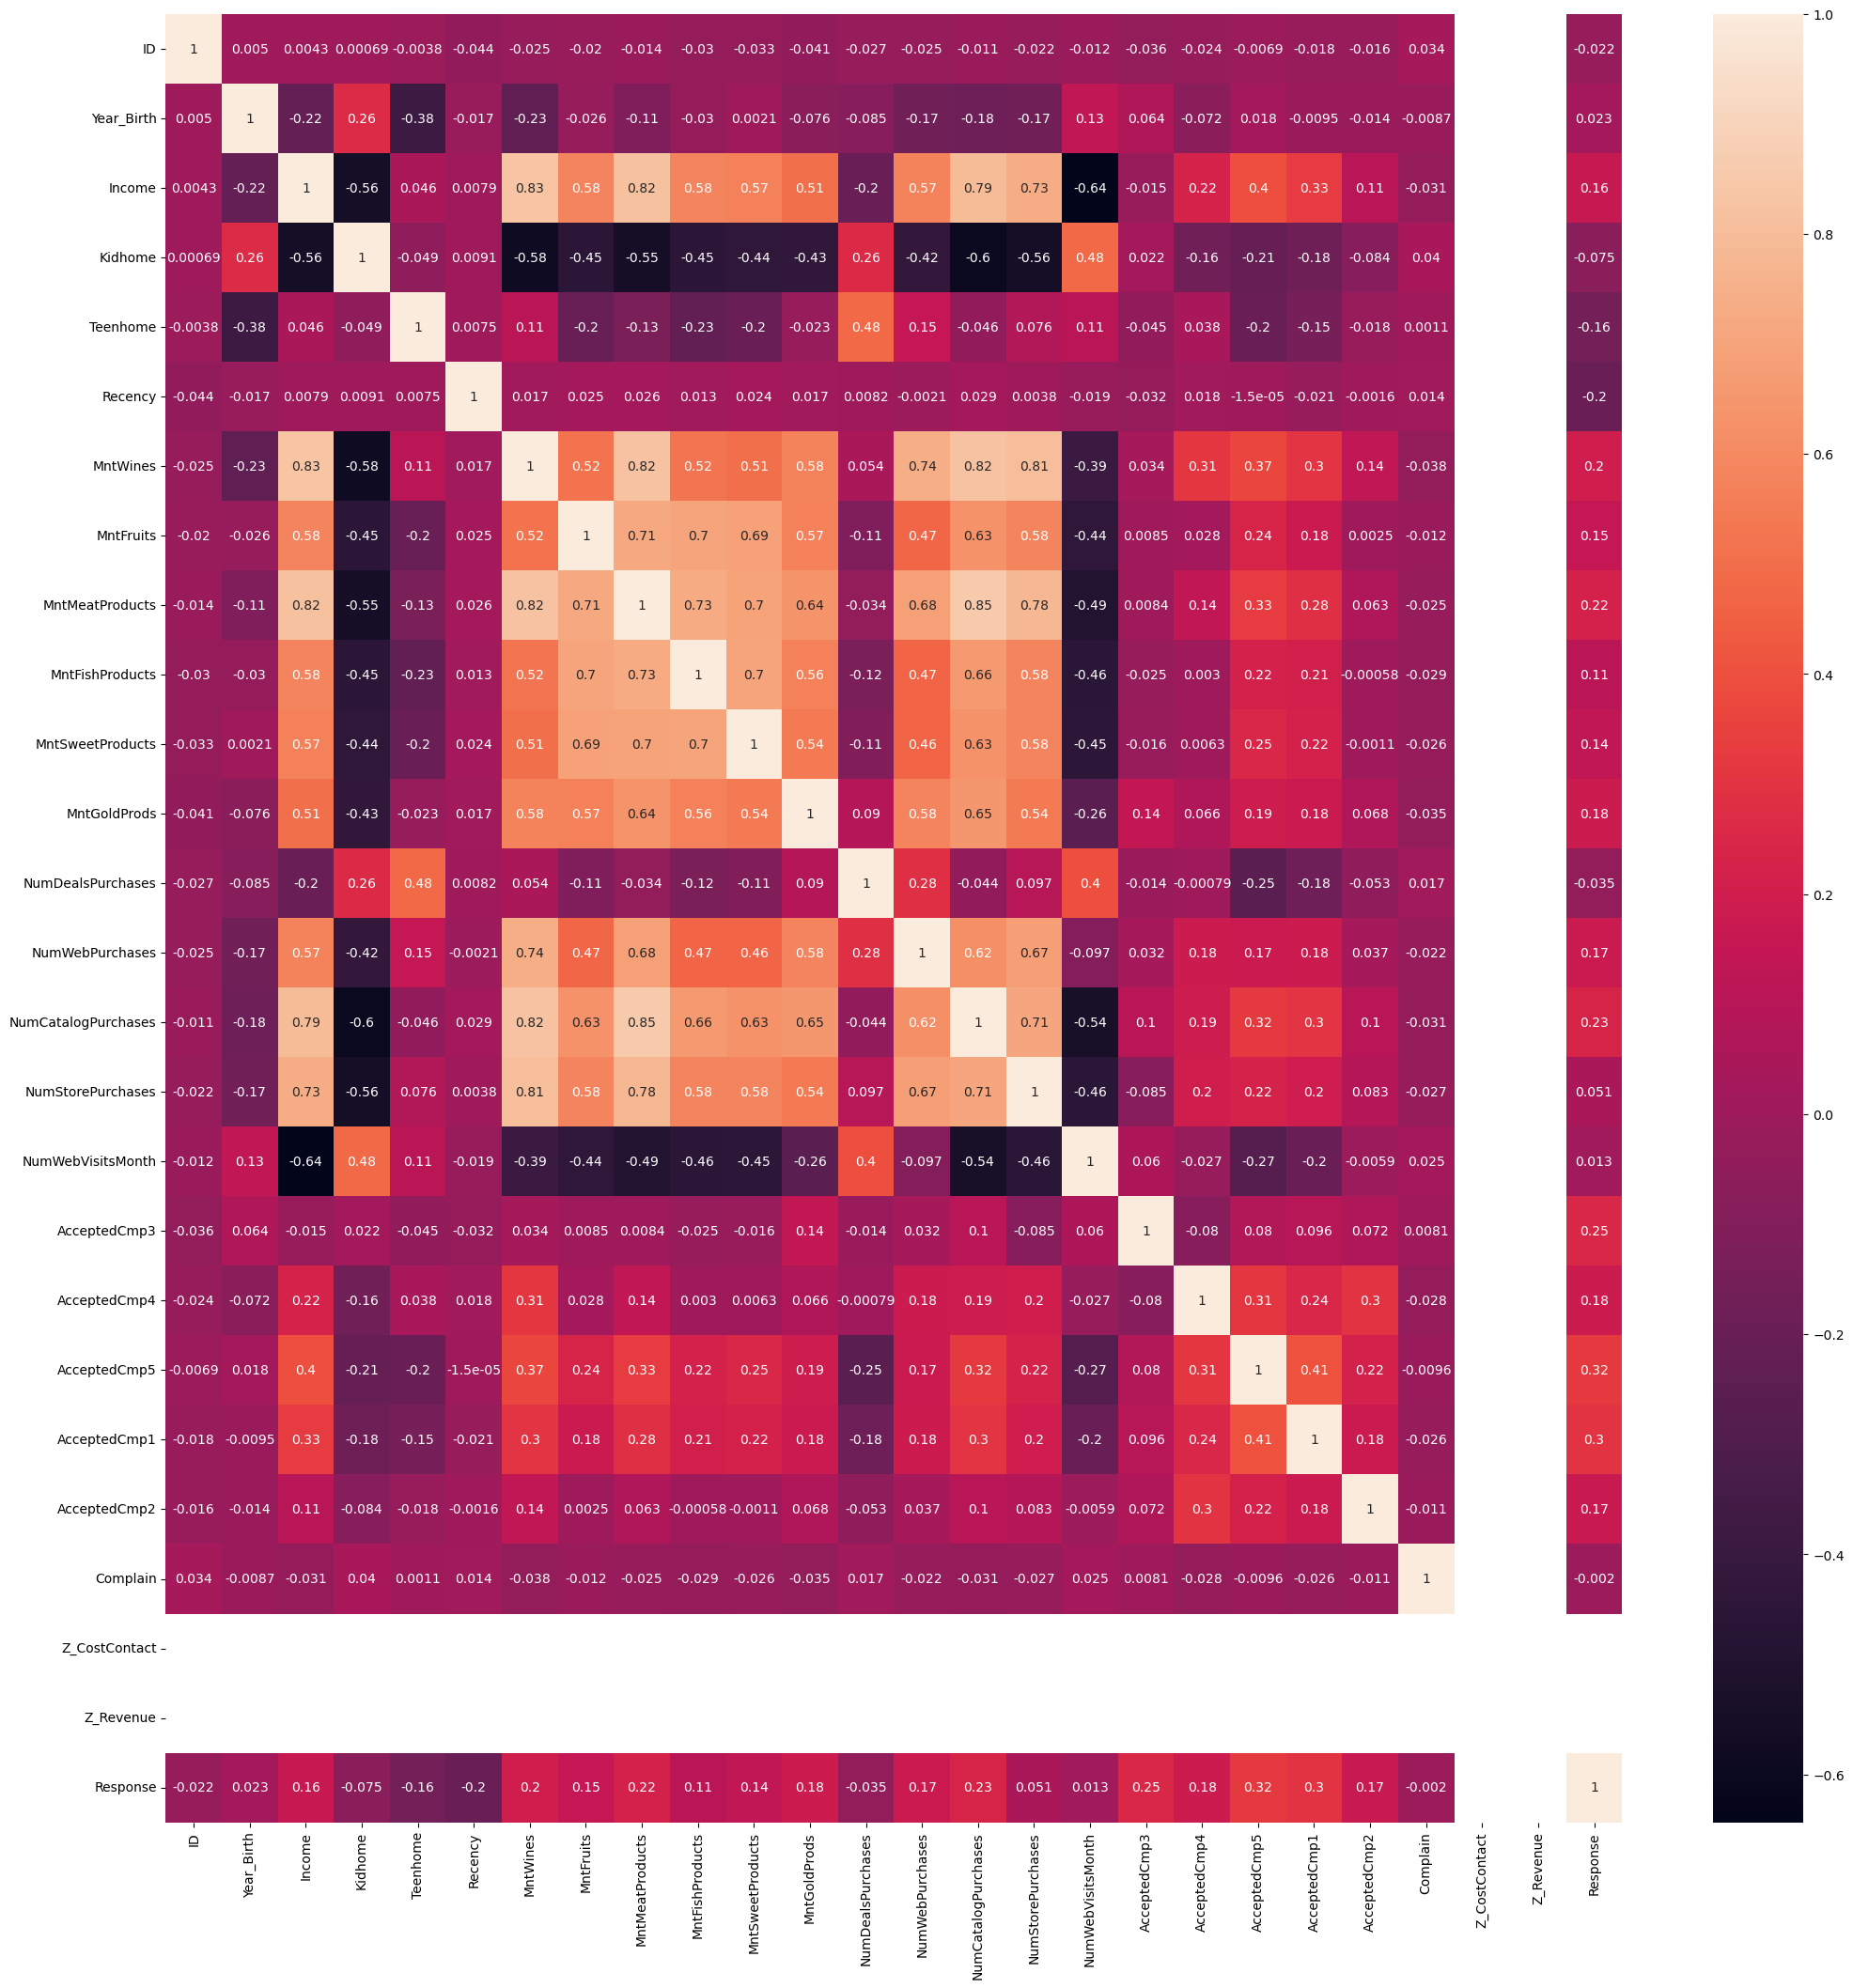

In [26]:
# Korelasi menggunakan heatmap

plt.figure(figsize=(25,25))
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

Setelah melalui 2 metode .corr dan heatmap untuk melihat seluruh korelasi antar kolomnya, didapatkan beberapa hal yang akan membantu proses analisis yakni :

* Variabel "Z_CostContact" dan "Z_Revenue" konsisten dari bentuk distribusi data histogram simetris hingga korelasi heatmap corr menunjukkan blank putih. Dapat disimpulkan bahwa 2 variabel tersebut bisa dihapus (di bagian data cleaning) karena tidak mempengaruhi data.
* Nilai korelasi yang paling baik yakni memiliki nilai yang mendekati 1 atau dengan warna yang lebih terang, bisa kita lihat dari heatmapp corr diatas beberapa contoh variabel yang memiliki korelasi baik yakni antara lain :

    1. Variabel "NumCatalogPurchases" dengan "MntMeatProudcts" dan "MntWines" dengan nilai heatmap corr 0.85 dan 0.82
    2. Variabel "Income" dengan "MntWines" dan "MntMeatProducts" dengan nilai heatmap corr 0.83 dan 0.82
    
    dari variabel yang memiliki nilai korelasi yang mendekati 1 tersebut menarik untuk dilakukan analisis karena bisa jadi dari variabel tersebut terdapat insight atau temuan untuk memberikan tingkat analisis yang lebih komprehensif.

### **Kategorik**

In [27]:
# Data kategorik

kategorik = df.select_dtypes(include = 'object')
kategorik

Education Marital_Status Dt_Customer
0     Graduation         Single  04-09-2012
1     Graduation         Single  08-03-2014
2     Graduation       Together  21-08-2013
3     Graduation       Together  10-02-2014
4            PhD        Married  19-01-2014
...          ...            ...         ...
2235  Graduation        Married  13-06-2013
2236         PhD       Together  10-06-2014
2237  Graduation       Divorced  25-01-2014
2238      Master       Together  24-01-2014
2239         PhD        Married  15-10-2012

[2240 rows x 3 columns]

#### Count Values

Memeriksa data kategorik awal untuk mengetahui berapa item kategori dan sebarannya

In [28]:
kategorik.nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

#### Modus

In [29]:
kategorik.describe(include = 'object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

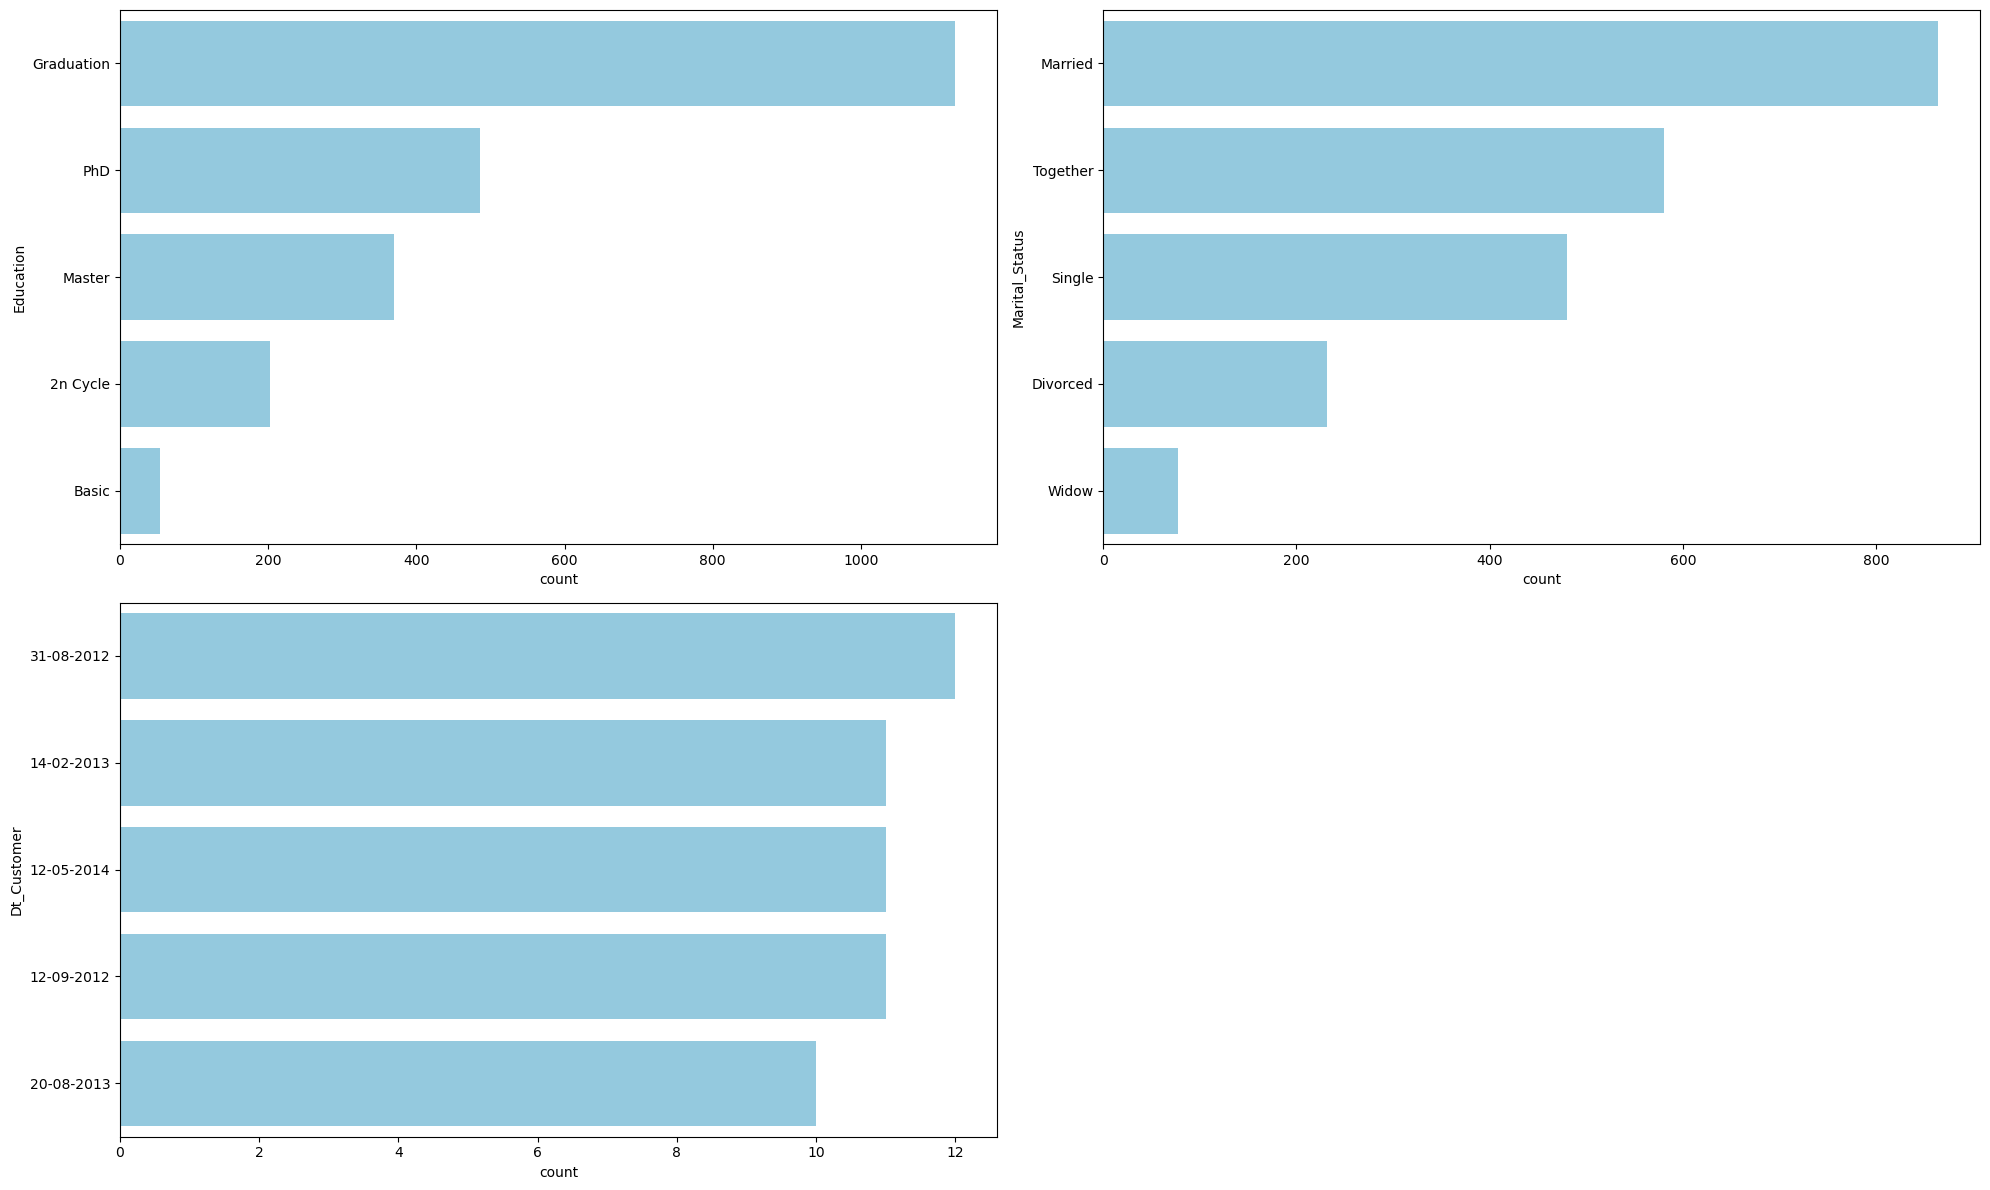

In [30]:
count = 0
fig = plt.figure(figsize=(20,12))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

Ringkasan dari Kategorik

Dari count values unique yang didapatkan dari data kategorik yakni sebagai berikut :
* Data "Education" memiliki 5 kategori yang berbeda
* Data "Marital_Status" memiliki 8 kategori status perkawinan
* Data "Dt_Customer" memiliki 663 kategori pendaftaran member customer

Dari modus :
* Pada bagian modus ini disajikan tiap variabel yang memili kategori unik serta menghasilkan jumlah paling banyak tiap kategori secara visual, namun hal ini akan berubah setelah dilakukan ***data cleaning*** dan ***feature engineering***

dari variabel data kategorik tersebut terdefine pada sebelum dilakukan ***data cleaning*** dan ***feature engineering***, nantinya akan berubah setelah proses tersebut dilakukan.

# **Data Cleaning**

Pada proses data cleaning ini akan dilakukan pembersihan serta penambahan variabel yang dibutuhkan untuk menunjang analisis. Diperlukan copy dataframe agar untuk mempermudah saat proses data cleaning bila ingin melakukan reset.

In [31]:
# Starting Point (copy dataframe agar dataframe asli tidak terpengaruh)

supermarket = df.copy()

In [32]:
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

## **Mengubah Tipe Data (Casting Data Types)**

In [33]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [34]:
supermarket['Dt_Customer'] = pd.to_datetime(supermarket['Dt_Customer'],format='%d-%m-%Y')
supermarket['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


## **Mengganti ID 0 dengan Random ID**

In [35]:
# Menghasilkan angka integer acak untuk mengisi ID yang bernilai 0
id = [id for id in supermarket['ID']]
np.random.seed(22)
id_0 = 0
while True:
    randomnumber = np.random.randint(low=1, high=10000)
    if randomnumber not in id:
        id_0 += randomnumber
        break
    else:
        continue

# Mengganti ID 0
supermarket['ID'] = supermarket['ID'].replace(0,id_0)
supermarket.loc[supermarket['ID'] == id_0]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
214  6277        1985  Graduation        Married  70951.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
214  2013-05-04       66       239         10              554   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
214              254                87            54                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
214                3                    4                  9   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
214                  1             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
214             0             0         0              3         11         0

##  **Drop Kolom**

Kolom 'Z_CostContact' dan'Z_Revenue' dihilangkan dari variabel karena sudah terbukti isi data tidak ada relevansi atau signifikansi dampak pada proses analisis

In [36]:
supermarket = supermarket.drop(['Z_CostContact','Z_Revenue'], axis = 1)
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## **Handling Outliers**

### Outliers Pada Kolom Year_Birth

In [37]:
supermarket.sort_values(by='Year_Birth',ascending=False,axis=0)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1170    193        1996       Basic        Married  14421.0        0   
46     9909        1996    2n Cycle        Married   7500.0        0   
995    5184        1995  Graduation         Single  34824.0        0   
1850   4427        1995    2n Cycle         Single  83257.0        0   
696    8315        1995  Graduation         Single  34824.0        0   
...     ...         ...         ...            ...      ...      ...   
424    6932        1941         PhD        Married  93027.0        0   
1950   6663        1940         PhD         Single  51141.0        0   
192    7829        1900    2n Cycle       Divorced  36640.0        1   
339    1150        1899         PhD       Together  83532.0        0   
239   11004        1893    2n Cycle         Single  60182.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1170         0  2014-02-17       81         0          0                2   
46           0  2012-11-09       24         3         18               14   
995          0  2014-03-26       65         4          2               11   
1850         0  2012-09-18       56       536         27              590   
696          0  2014-03-26       65         4          2               11   
...        ...         ...      ...       ...        ...              ...   
424          0  2013-04-13       77      1285         42              716   
1950         0  2013-07-08       96       144          0                7   
192          0  2013-09-26       99        15          6                8   
339          0  2013-09-26       36       755        144              562   
239          1  2014-05-17       23         8          0                5   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1170                3                 3             8                  1   
46                 15                22            50                  3   
995                 2                 0             4                  1   
1850               38               107            67                  1   
696                 2                 0             4                  1   
...               ...               ...           ...                ...   
424                55                 0            21                  0   
1950                0                 0             6                  1   
192                 7                 4            25                  1   
339               104                64           224                  1   
239                 7                 0             2                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1170                1                    0                  2   
46                  3                    1                  3   
995                 1                    0                  2   
1850                5                   10                 12   
696                 1                    0                  2   
...               ...                  ...                ...   
424                 7                   10                  5   
1950                3                    1                  4   
192                 2                    1                  2   
339                 4                    6                  4   
239                 1                    0                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1170                  5             1             0             0   
46                    9             0             0             0   
995                   6             0             0             0   
1850                  6             1             0             1   
696                   6             0             0             0   
...                 ...           ...           ...           ...   
424                   2             0     

In [38]:
supermarket.loc[[239,339,192]]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
239  2014-05-17       23         8          0                5   
339  2013-09-26       36       755        144              562   
192  2013-09-26       99        15          6                8   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
239                7                 0             2                  1   
339              104                64           224                  1   
192                7                 4            25                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
239                1                    0                  2   
339                4                    6                  4   
192                2                    1                  2   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
239                  4             0             0             0   
339                  1             0             0             1   
192                  5             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  
239             0             0         0         0  
339             0             0         0         0  
192             0             0         1         0

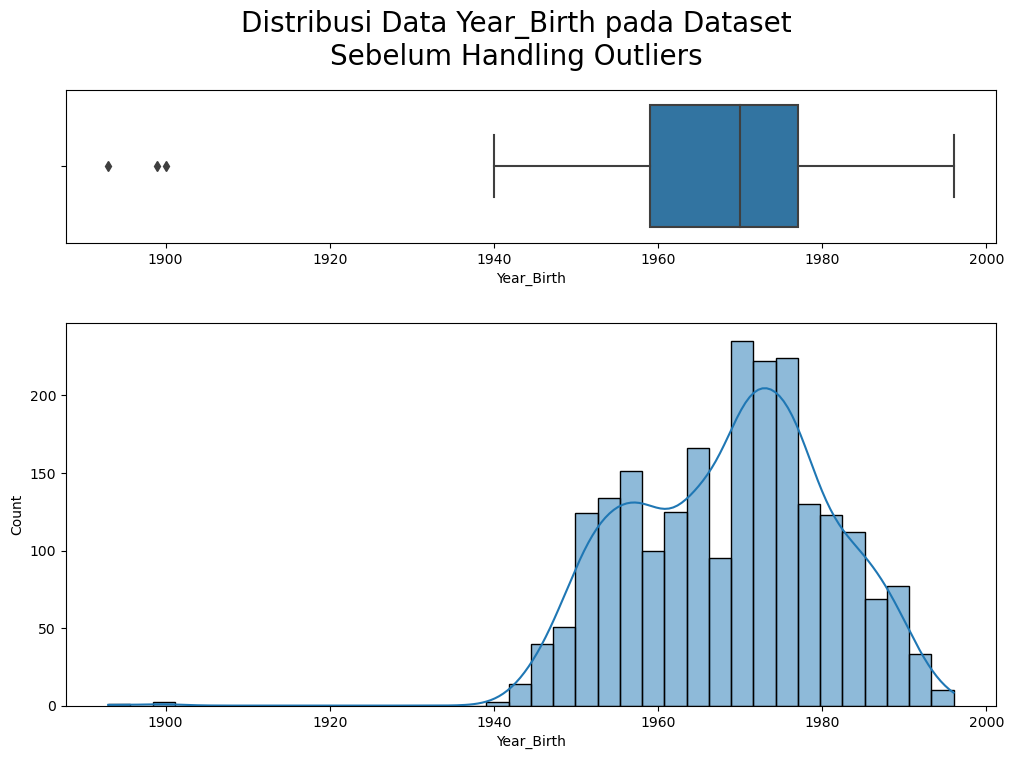

In [39]:
# Melihat distribusi data Year_Birth yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,8),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Year_Birth',ax=axes1)
sns.histplot(data=supermarket, x='Year_Birth', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Year_Birth pada Dataset\nSebelum Handling Outliers\n', size = 20)
plt.show()

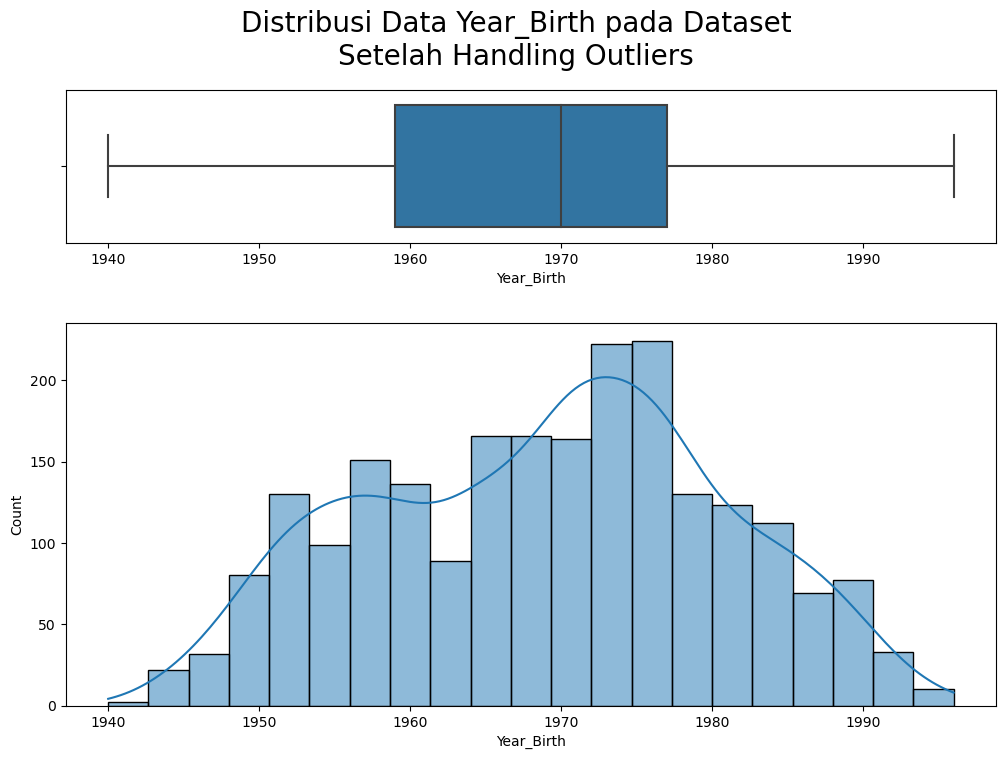

In [40]:
# Drop data outliers (Handling data outliers dari Year_Birth)
supermarket.drop([239,339,192],axis=0,inplace=True)

# Periksa kembali distribusi data Age
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,8),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Year_Birth',ax=axes1)
sns.histplot(data=supermarket, x='Year_Birth', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Year_Birth pada Dataset\nSetelah Handling Outliers\n', size = 20)
plt.show()

### Outliers Kolom Income

In [41]:
supermarket.sort_values(by='Income',ascending=False,axis=0)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233   9432        1977  Graduation       Together  666666.0        1   
617    1503        1976         PhD       Together  162397.0        1   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
164    8475        1973         PhD        Married  157243.0        0   
...     ...         ...         ...            ...       ...      ...   
2078   5079        1971  Graduation        Married       NaN        1   
2079  10339        1954      Master       Together       NaN        0   
2081   3117        1955  Graduation         Single       NaN        0   
2084   5250        1943      Master          Widow       NaN        0   
2228   8720        1978    2n Cycle       Together       NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  2013-06-02       23         9         14               18   
617          1  2013-06-03       31        85          1               16   
687          0  2012-08-04       21        55         16             1622   
1300         0  2013-06-04       37        39          1                9   
164          1  2014-03-01       98        20          2             1582   
...        ...         ...      ...       ...        ...              ...   
2078         1  2013-03-03       82        71          1               16   
2079         1  2013-06-23       83       161          0               22   
2081         1  2013-10-18       95       264          0               21   
2084         0  2013-10-30       75       532        126              490   
2228         0  2012-08-12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   
617                 2                 1             2                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
164                 1                 2             1                 15   
...               ...               ...           ...                ...   
2078                0                 0             9                  4   
2079                0                 0            24                  2   
2081               12                 6           147                  3   
2084              164               126           126                  1   
2228               12                 4            22                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   
617                 0                    0                  1   
687                 0                   28                  1   
1300                1                    0                  1   
164                 0                   22                  0   
...               ...                  ...                ...   
2078                2                    1                  3   
2079                4                    1                  4   
2081                6                    1                  5   
2084                5                    5                 11   
2228                0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   
617                   1             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
164                   0             0             0             0   
...                 ...           ...           ...           ...   
2078                  8       

In [42]:
supermarket.loc[[2233]]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  2013-06-02       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2233             0             0         0         0

Dari sini, kita dapat melihat bahwa ada pencilan yang ekstrim di mana seseorang yang hanya bergelar sarjana memiliki penghasilan 13 kali lebih tinggi dari penghasilan rata-rata, yang secara logika sangat tidak biasa. Selain itu, kita dapat melihat bahwa pengguna ini telah menjadi anggota sejak tahun 2013 namun memiliki jumlah transaksi yang relatif minim, sehingga tidak terlalu berpengaruh terhadap dataset (hanya 1/2240 = 0.044%). Oleh karena itu, diputuskan untuk membuang titik data ini. Sementara itu, nilai yang hilang lainnya akan diisi menggunakan Median karena setiap pelanggan memiliki potensi untuk analisis RFM, sehingga memungkinkan untuk mendapatkan perlakuan yang tepat.

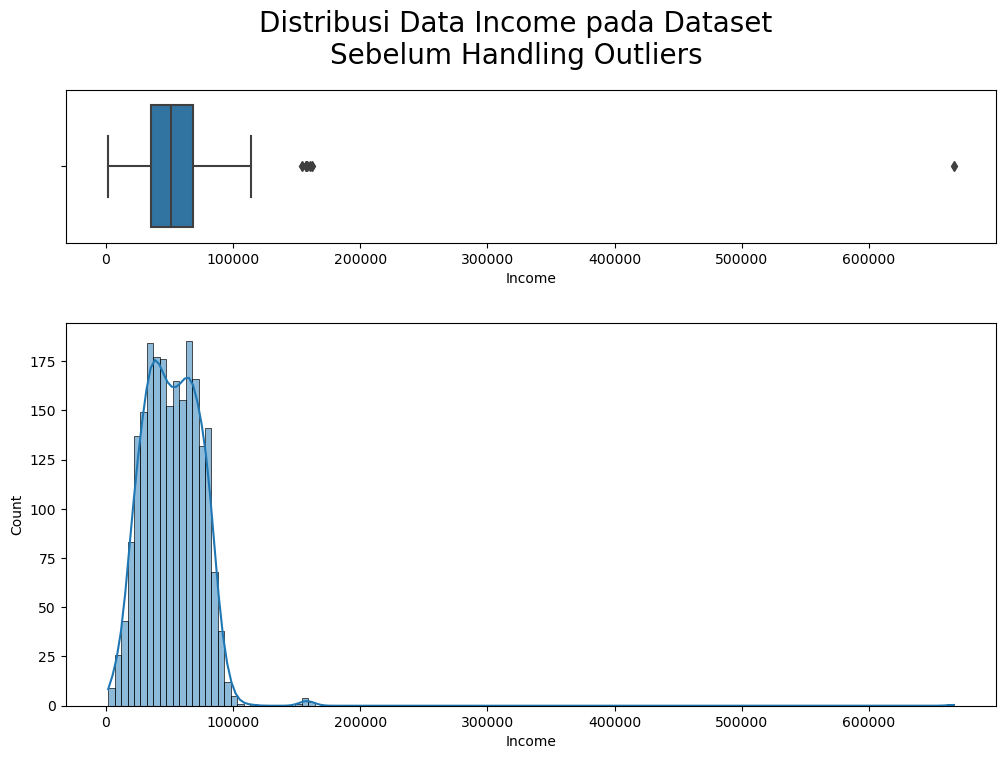

In [43]:
# Melihat distribusi data Income yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,8),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Income',ax=axes1)
sns.histplot(data=supermarket, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Income pada Dataset\nSebelum Handling Outliers\n', size = 20)
plt.show()

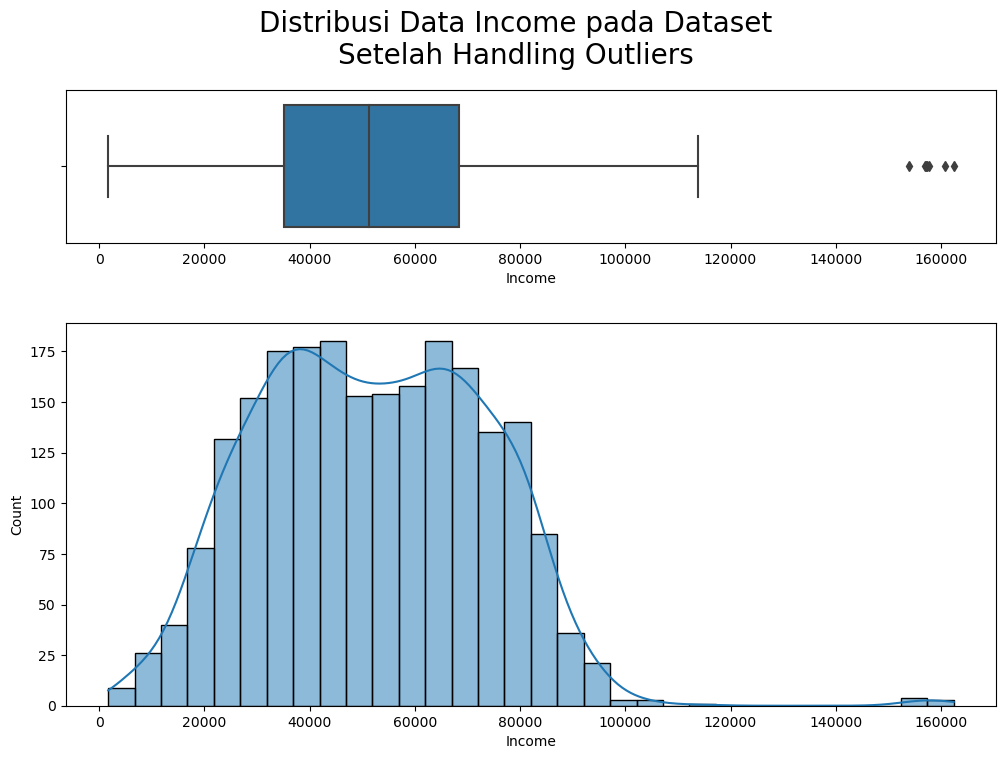

In [44]:
# Drop data outliers (Handling data outliers dari Income)
supermarket.drop([2233],axis=0,inplace=True)

# Periksa kembali distribusi data Income
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,8),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Income',ax=axes1)
sns.histplot(data=supermarket, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Income pada Dataset\nSetelah Handling Outliers\n', size = 20)
plt.show()

Note :
* Sisa pencilan yang ada tidak dilakukan penghapusan karena data masih logis dan relevan

## **Drop Data Abnormal**

In [45]:
# Cek awal data abnormal
abnormaldata = supermarket[(supermarket['NumDealsPurchases']==0) & (supermarket['NumWebPurchases']==0) & (supermarket['NumCatalogPurchases']==0) & (supermarket['NumStorePurchases']==0)]
abnormaldata

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
981    3955        1965  Graduation       Divorced    4861.0        0   
1524  11110        1973  Graduation         Single    3502.0        1   
2132  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0  2014-02-07       81         1          1                1   
981          0  2014-06-22       20         2          1                1   
1524         0  2013-04-13       56         2          1                1   
2132         0  2013-08-29       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1524                0                 0             1                  0   
2132                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
655                 0                    0                  0   
981                 0                    0                  0   
1524                0                    0                  0   
2132                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
655                   0             0             0             0   
981                  14             0             0             0   
1524                 14             0             0             0   
2132                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
655              0             0         0         0  
981              0             0         0         0  
1524             0             0         0         0  
2132             0             0         0         0

Menghapus (drop) baris yang didalamnya terdapat data yang abnormal, yakni temuannya:
* 4 orang pernah membeli produk pada kolom 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', namun tidak pernah ada data berbelanja (checkout) pada semua data Number of Purchase

In [46]:
supermarket.drop([655,981,1524,2132],axis = 0,inplace=True)

In [47]:
# Cek kembali data abnormal
supermarket[(supermarket['NumDealsPurchases']==0) & (supermarket['NumWebPurchases']==0) & (supermarket['NumCatalogPurchases']==0) & (supermarket['NumStorePurchases']==0)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

## **Penggantian Komposisi Kategorik (Unique Value)**

In [48]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2232 non-null   int64         
 6   Teenhome             2232 non-null   int64         
 7   Dt_Customer          2232 non-null   datetime64[ns]
 8   Recency              2232 non-null   int64         
 9   MntWines             2232 non-null   int64         
 10  MntFruits            2232 non-null   int64         
 11  MntMeatProducts      2232 non-null   int64         
 12  MntFishProducts      2232 non-null   int64         
 13  MntSweetProducts     2232 non-null   i

### Education

In [49]:
supermarket['Education'].value_counts()

Education
Graduation    1123
PhD            484
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [50]:
# Membuat fungsi untuk mengganti komposisi nama dari kolom 'Education'
def edulevel (edu) :
    if edu == '2n Cycle' :
        return 'Master'
    elif edu == 'Basic' :
        return 'Non-degree'
    elif edu == 'Graduation' :
        return 'Bachelor'
    elif edu == 'PhD':
        return 'Doctoral'
    else :
        return edu

In [51]:
# Apply fungsi edulevel ke variabel Education untuk mengubah
supermarket['Education'] = supermarket['Education'].apply(edulevel)

In [52]:
# Cek variabel Education setelah diubah
supermarket['Education'].value_counts()

Education
Bachelor      1123
Master         571
Doctoral       484
Non-degree      54
Name: count, dtype: int64

### Marital_Status

In [53]:
supermarket['Marital_Status'].value_counts()

Marital_Status
Married     863
Together    578
Single      478
Divorced    229
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [54]:
# Membuat fungsi untuk mengganti komposisi nama dari kolom 'Marital_Status'
def maritalstatus (marital) :
    if marital == 'Together' :
        return 'Cohabitation'
    elif marital == 'Absurd' :
        return 'Single'
    elif marital == 'YOLO' :
        return 'Single'
    elif marital == 'Widow':
        return 'Divorced'
    elif marital == 'Alone':
        return 'Single'
    else :
        return marital

In [55]:
# Apply fungsi maritalstatus ke variabel Marital_Status untuk mengubah
supermarket['Marital_Status'] = supermarket['Marital_Status'].apply(maritalstatus)

# Cek variabel Marital_Status setelah diubah
supermarket['Marital_Status'].value_counts()

Marital_Status
Married         863
Cohabitation    578
Single          485
Divorced        306
Name: count, dtype: int64

In [56]:
supermarket.groupby(['Marital_Status','Education'])[['ID']].count()

ID
Marital_Status Education      
Cohabitation   Bachelor    285
               Doctoral    116
               Master      163
               Non-degree   14
Divorced       Bachelor    152
               Doctoral     76
               Master       76
               Non-degree    2
Married        Bachelor    433
               Doctoral    191
               Master      219
               Non-degree   20
Single         Bachelor    253
               Doctoral    101
               Master      113
               Non-degree   18

## **Feature Engineering (Penambahan Kolom)**

Pada bagian feature engineering ini akan ditambahkan kolom yang diperlukan untuk menunjang dan mempermudah analisis

In [57]:
# Periksa kembali data supermarket
display(supermarket.head(),supermarket.tail())

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Bachelor         Single  58138.0        0         0   
1  2174        1954  Bachelor         Single  46344.0        1         1   
2  4141        1965  Bachelor   Cohabitation  71613.0        0         0   
3  6182        1984  Bachelor   Cohabitation  26646.0        1         0   
4  5324        1981  Doctoral        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2235  10870        1967  Bachelor        Married  61223.0        0         1   
2236   4001        1946  Doctoral   Cohabitation  64014.0        2         1   
2237   7270        1981  Bachelor       Divorced  56981.0        0         0   
2238   8235        1956    Master   Cohabitation  69245.0        0         1   
2239   9405        1954  Doctoral        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235  2013-06-13       46       709         43              182   
2236  2014-06-10       56       406          0               30   
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0         0         0  
2236             1             0         0         0  
2237             0             0         0         0  
2238             0             0         0         0  
2239             0             0         0         1

### Kolom Age (Umur Pelanggan/Member)

In [58]:
# Melihat tanggal pendaftaran member paling terakhir untuk acuan waktu data diambil
supermarket['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [59]:
# Menggunakan fungsi insert() untuk menambahkan kolom Age sesuai urutan kolom yang diinginkan
supermarket.insert(2, 'Age', supermarket['Year_Birth'].apply(lambda x : 2014-x))

# Cek kolom Age
supermarket.head()

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957   57  Bachelor         Single  58138.0        0         0   
1  2174        1954   60  Bachelor         Single  46344.0        1         1   
2  4141        1965   49  Bachelor   Cohabitation  71613.0        0         0   
3  6182        1984   30  Bachelor   Cohabitation  26646.0        1         0   
4  5324        1981   33  Doctoral        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

### Kolom Range Umur

Menambahkan kolom klasifikasi Umur dengan [referensi umur melalui generasi](https://www.mentalfloss.com/article/609811/age-ranges-millennials-and-generation-z) guna untuk membantu proses analisa dan pembuatan dashboard.

In [60]:
supermarket['Age'].describe()

count    2232.000000
mean       45.095878
std        11.704862
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

In [61]:
def rangeumur (int) :
    if int < 11 :
        return 'Gen Alpha'
    elif 12 <= int <= 27 :
        return 'Gen Z'
    elif 28 <= int <= 43 :
        return 'Millennials'
    elif 44 <= int <= 59 :
        return 'Gen X'
    elif 60 <= int <= 78 :
        return 'Baby Boomers'
    else :
        return 'Silent Generation-Elder'

In [62]:
supermarket.insert(3,'Age_Range',supermarket['Age'].apply(rangeumur))
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
0           0         0  2012-09-04       58       635         88   
1           1         1  2014-03-08       38        11          1   
2           0         0  2013-08-21       26       426         49   
3           1         0  2014-02-10       26        11          4   
4           1         0  2014-01-19       94       173         43   
...       ...       ...         ...      ...       ...        ...   
2235        0         1  2013-06-13       46       709         43   
2236        2         1  2014-06-10       56       406          0   
2237        0         0  2014-01-25       91       908         48   
2238        0         1  2014-01-24        8       428         30   
2239        1         1  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4        

### Kolom Total Isi Keluarga (Total_Family_Member)

In [63]:
supermarket.groupby(['Marital_Status'])[['Kidhome','Teenhome']].sum()

Kidhome  Teenhome
Marital_Status                   
Cohabitation        260       307
Divorced            113       186
Married             394       442
Single              225       198

In [64]:
def totfam_member (fam_member) :
    if fam_member == 'Married' :
        return 2
    elif fam_member == 'Cohabitation' :
        return 2
    else :
        return 1

In [65]:
supermarket.insert(9,'FamilyMember',supermarket['Marital_Status'].apply(totfam_member) + supermarket['Kidhome'] + supermarket['Teenhome'])

In [66]:
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4          

### Kolom Harga Produk

Penyajian harga dan penentuan jenis produk :

Sweet Products [Reference](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)
* Chocolate, Cookies, etc.
* **$ 2.27/pcs** Average (Rata-rata)

Gold Products [Reference](https://www.amazon.in/Skin-Care/b?ie=UTF8&node=1374407031)
* Beauty ,Skincare, Cosmetics, etc.
* **$ 10/pcs** Average (Rata-rata)

Fruit Products [Reference](https://agro-market24.eu/fruits-exchange-price-buy-sell-19)
* **$ 4/kg** Average (Rata-rata)

Meat Products [Reference](https://www.statista.com/statistics/675826/average-prices-meat-beef-worldwide/)
* **$ 5/kg** Average (Rata-rata)

Wine Products [Reference](https://www.quora.com/How-much-does-wine-cost-per-ounce-on-average)
* **$ 32 /bottle** Average (Rata-rata)

Fish Products [Reference](https://www.selinawamucii.com/insights/prices/united-states-of-america/fish/)
* **$ 8,5 /kg** Average (Rata-rata)

In [67]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Age                  2232 non-null   int64         
 3   Age_Range            2232 non-null   object        
 4   Education            2232 non-null   object        
 5   Marital_Status       2232 non-null   object        
 6   Income               2208 non-null   float64       
 7   Kidhome              2232 non-null   int64         
 8   Teenhome             2232 non-null   int64         
 9   FamilyMember         2232 non-null   int64         
 10  Dt_Customer          2232 non-null   datetime64[ns]
 11  Recency              2232 non-null   int64         
 12  MntWines             2232 non-null   int64         
 13  MntFruits            2232 non-null   i

In [68]:
# Membuat variabel baru untuk data harga pengeluaran produk
p1 = supermarket['MntWines']*32
p2 = supermarket['MntFruits']*4
p3 = supermarket['MntMeatProducts']*5
p4 = supermarket['MntFishProducts']*8.5
p5 = supermarket['MntSweetProducts']*2.27
p6 = supermarket['MntGoldProds']*10

In [69]:
supermarket.insert(18,'WinesExpense',p1)
supermarket.insert(19,'FruitsExpense',p2)
supermarket.insert(20,'MeatExpense',p3)
supermarket.insert(21,'FishExpense',p4)
supermarket.insert(22,'SweetExpense',p5)
supermarket.insert(23,'GoldExpense',p6)

In [70]:
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  NumDealsPurchases  NumWebPurchases  \
0           199.76          880                  3                8   
1             2.27           60                  2                1   
2            47.67          420                  1                8   
3             6.81           50                  2                2   
4            61.29          150                  5

### Kolom Total Uang Keluar dari Customer/Member (Total_Money_Spent)

In [71]:
supermarket.insert(24,'TotalSpent',supermarket[['WinesExpense','FruitsExpense','MeatExpense','FishExpense','SweetExpense','GoldExpense']].sum(axis=1))
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  NumDealsPurchases  \
0           199.76          880    25943.76                  3   
1             2.27           60      465.27                  2   
2            47.67          420    15874.17                  1   
3             6.81           50      609.81                  2   
4            61.29          150     6900.29                  5   
...      

### Kolom Total Jumlah Produk Terbeli (Total Amount Purchased Products)

In [72]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Age                  2232 non-null   int64         
 3   Age_Range            2232 non-null   object        
 4   Education            2232 non-null   object        
 5   Marital_Status       2232 non-null   object        
 6   Income               2208 non-null   float64       
 7   Kidhome              2232 non-null   int64         
 8   Teenhome             2232 non-null   int64         
 9   FamilyMember         2232 non-null   int64         
 10  Dt_Customer          2232 non-null   datetime64[ns]
 11  Recency              2232 non-null   int64         
 12  MntWines             2232 non-null   int64         
 13  MntFruits            2232 non-null   i

In [73]:
supermarket.insert(25,'PurchasedItemTotal',supermarket[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1))
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29                 422   
...

### Kolom Frekuensi Pembelian

In [74]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Age                  2232 non-null   int64         
 3   Age_Range            2232 non-null   object        
 4   Education            2232 non-null   object        
 5   Marital_Status       2232 non-null   object        
 6   Income               2208 non-null   float64       
 7   Kidhome              2232 non-null   int64         
 8   Teenhome             2232 non-null   int64         
 9   FamilyMember         2232 non-null   int64         
 10  Dt_Customer          2232 non-null   datetime64[ns]
 11  Recency              2232 non-null   int64         
 12  MntWines             2232 non-null   int64         
 13  MntFruits            2232 non-null   i

In [75]:
supermarket.insert(31,'FreqPurchased',supermarket[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']].sum(axis=1))
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29                 422   
...

### Kolom Total Promo dan Kategorisasi Penerima Promo

In [76]:
# Menambahkan kolom total promo/campaign diterima untuk analisa
supermarket.insert(38,'PromoReceived',supermarket[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1))

In [77]:
# fungsi untuk membagi pelanggan yang tidak pernah menerima promo atau menerima satu kali atau lebih
def campaign (campaignacc) :
    if campaignacc == 0:
        return 'Never accepted promos'
    else :
        return 'Accepted promos'

supermarket.insert(40,'PromoAcceptedCat',supermarket['PromoReceived'].apply(campaign))
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29                 422   
...

### Kolom Kategorisasi Income

Untuk mempermudah analisis, kami juga membuat kategori kelompok untuk kolom Income, berdasarkan data worldback Income dibagimenjadi 4 kategori: 
referensi dapat diakses [disini](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)

1. Lower
2. Lower-Middle
3. Upper-Middle
4. Upper

Kami membagi dari nilai Min, Q1, Q2, Q3, Max

In [78]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Age                  2232 non-null   int64         
 3   Age_Range            2232 non-null   object        
 4   Education            2232 non-null   object        
 5   Marital_Status       2232 non-null   object        
 6   Income               2208 non-null   float64       
 7   Kidhome              2232 non-null   int64         
 8   Teenhome             2232 non-null   int64         
 9   FamilyMember         2232 non-null   int64         
 10  Dt_Customer          2232 non-null   datetime64[ns]
 11  Recency              2232 non-null   int64         
 12  MntWines             2232 non-null   int64         
 13  MntFruits            2232 non-null   i

In [79]:
supermarket['Income'].describe()

count      2208.000000
mean      51908.368659
std       21271.790733
min        1730.000000
25%       35303.000000
50%       51371.000000
75%       68468.250000
max      162397.000000
Name: Income, dtype: float64

In [80]:
# Buat pengelompokan untuk kategori usia berdasarkan kuantil dan buat kolomnya

def labelincome(x):
    if x <= 35303:
        return 'Lower'
    elif x <= 51371:
        return 'Lower-Middle'
    elif x <= 68468:
        return 'Upper-Middle'
    else:
        return 'Upper'
    
supermarket.insert(41,'IncomeCategory',supermarket['Income'].apply(labelincome))

# Periksa data kembali
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29                 422   
...

## Handling Missing Value

In [81]:
supermarket[supermarket.isna().any(axis=1)].sort_values(by='Age',ascending=False)

ID  Year_Birth  Age     Age_Range Education Marital_Status  Income  \
2084   5250        1943   71  Baby Boomers    Master       Divorced     NaN   
48     7244        1951   63  Baby Boomers  Bachelor         Single     NaN   
2079  10339        1954   60  Baby Boomers    Master   Cohabitation     NaN   
2081   3117        1955   59         Gen X  Bachelor         Single     NaN   
90     8996        1957   57         Gen X  Doctoral        Married     NaN   
91     9235        1957   57         Gen X  Bachelor         Single     NaN   
1382   2902        1958   56         Gen X  Bachelor   Cohabitation     NaN   
43     7281        1959   55         Gen X  Doctoral         Single     NaN   
128    8268        1961   53         Gen X  Doctoral        Married     NaN   
133    1295        1963   51         Gen X  Bachelor        Married     NaN   
1383   4345        1964   50         Gen X    Master         Single     NaN   
2059   7187        1969   45         Gen X    Master   Cohabitation     NaN   
1379  10475        1970   44         Gen X    Master   Cohabitation     NaN   
319    2863        1970   44         Gen X  Bachelor         Single     NaN   
2078   5079        1971   43   Millennials  Bachelor        Married     NaN   
1386   3769        1972   42   Millennials  Doctoral   Cohabitation     NaN   
92     5798        1973   41   Millennials    Master   Cohabitation     NaN   
71    10629        1973   41   Millennials    Master        Married     NaN   
2228   8720        1978   36   Millennials    Master   Cohabitation     NaN   
2061   1612        1981   33   Millennials  Doctoral         Single     NaN   
58     8557        1982   32   Millennials  Bachelor         Single     NaN   
10     1994        1983   31   Millennials  Bachelor        Married     NaN   
27     5255        1986   28   Millennials  Bachelor         Single     NaN   
312    2437        1989   25         Gen Z  Bachelor        Married     NaN   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
2084        0         0             1  2013-10-30       75       532   
48          2         1             4  2014-01-01       96        48   
2079        0         1             3  2013-06-23       83       161   
2081        0         1             2  2013-10-18       95       264   
90          2         1             5  2012-11-19        4       230   
91          1         1             3  2014-05-27       45         7   
1382        1         1             4  2012-09-03       87        19   
43          0         0             1  2013-11-05       80        81   
128         0         1             3  2013-07-11       23       352   
133         0         1             3  2013-08-11       96       231   
1383        1         1             3  2014-01-12       49         5   
2059        1         1             4  2013-05-18       52       375   
1379        0         1             3  2013-04-01       39       187   
319         1         2             4  2013-08-23       67       738   
2078        1         1             4  2013-03-03       82        71   
1386        1         0             3  2014-03-02       17        25   
92          0         0             2  2013-11-23       87       445   
71          1         0             3  2012-09-14       25        25   
2228        0         0             2  2012-08-12       53        32   
2061        1         0             2  2013-05-31       82        23   
58          1         0             2  2013-06-17       57        11   
10          1         0             3  2013-11-15       11         5   
27          1         0             2  2013-02-20       19         5   
312         0         0             2  2013-06-03       69       861   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
2084        126              490              164               126   
48            5               48                6                10   
2079          0    

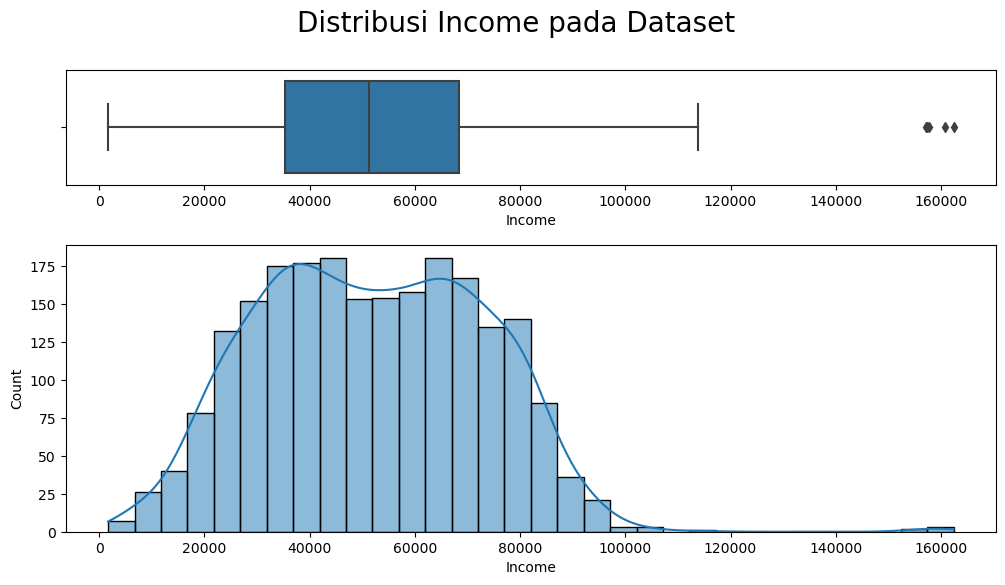

In [82]:
# Melihat distribusi data Income yang dinyatakan memiliki missing value
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Income',ax=axes1)
sns.histplot(data=supermarket, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

In [83]:
print(supermarket['Income'].kurtosis())
print(supermarket['Income'].skew())

0.3756914782212273
0.2743378032649998


**Analisis Visual pada Distribusi Data Income**

 Dari histogram, terlihat bahwa data pendapatan cenderung memiliki ekor yang lebih panjang di sebelah kanan, yang juga dikonfirmasi oleh boxplot yang menunjukkan ada outlier di sisi kanan. Selain itu, hasil perhitungan skewness menunjukkan bahwa grafik miring positif atau miring ke kanan (skewness > 0), dan grafik cenderung datar (kurtosis < 3).Berdasarkan pengamatan tersebut, distribusi data diduga tidak normal. Untuk memastikan hal ini, akan dilakukan uji normalitas dengan menggunakan uji D' Agustino Pearson (karena jumlah data < 5000, maka metode [Shapiro-Wilk](https://stats.stackexchange.com/questions/446262/can-a-sample-larger-than-5-000-data-points-be-tested-for-normality-using-shapiro) umumnya lebih efektif).

In [84]:
# Shapiro-Wilk

stat, pvalue = shapiro(supermarket['Income'].dropna())

if pvalue < 0.05:
  print('Distribusi Data tidak normal')
else:
  print('DistribusiData normal')

Distribusi Data tidak normal


Dari hasil uji normalitas di atas, dapat disimpulkan bahwa data tidak terdistribusi secara normal. Oleh karena itu, untuk mengisi nilai yang hilang, kita akan menggunakan nilai median. Untuk membuat imputasi lebih akurat, kita akan mencoba mengelompokkan pendapatan berdasarkan rentang usia dan tingkat pendidikan. Kemudian, kita akan mengisi nilai yang hilang dengan median pendapatan yang sesuai dengan rentang usia, tingkat pendidikan, dan status pernikahan. Di bawah ini adalah tabel nilai median untuk setiap kelas rentang usia dan tingkat pendidikan:

In [85]:
income_inputval = supermarket.groupby(['Age_Range','Education','Marital_Status'])[['Income']].median()
income_inputval

Income
Age_Range    Education  Marital_Status         
Baby Boomers Bachelor   Cohabitation    51315.0
                        Divorced        64587.0
                        Married         58207.5
                        Single          60689.0
             Doctoral   Cohabitation    64259.0
                        Divorced        54985.0
                        Married         58607.0
                        Single          62159.0
             Master     Cohabitation    55951.0
                        Divorced        59354.0
                        Married         66835.0
                        Single          58217.0
             Non-degree Cohabitation    20736.5
                        Married         26997.0
Gen X        Bachelor   Cohabitation    55257.0
                        Divorced        57705.5
                        Married         58114.5
                        Single          57099.0
             Doctoral   Cohabitation    54132.0
                        Divorced        54237.0
                        Married         57072.0
                        Single          48918.0
             Master     Cohabitation    50943.0
                        Divorced        57167.0
                        Married         56962.0
                        Single          56796.0
             Non-degree Cohabitation    22512.0
                        Divorced        22123.0
                        Married         28249.0
                        Single          19292.5
Gen Z        Bachelor   Cohabitation    67430.0
                        Divorced        81361.0
                        Married         35350.0
                        Single          48789.0
             Doctoral   Cohabitation    68682.0
                        Married         67546.0
                        Single          42000.0
             Master     Cohabitation    40676.5
                        Divorced        23183.5
                        Married         30390.0
                        Single          80617.0
             Non-degree Cohabitation    13724.0
                        Married         17487.0
                        Single          16185.0
Millennials  Bachelor   Cohabitation    47410.0
                        Divorced        44421.0
                        Married         43057.0
                        Single          42160.0
             Doctoral   Cohabitation    47127.5
                        Divorced        55412.0
                        Married         51650.0
                        Single          44925.5
             Master     Cohabitation    42033.0
                        Divorced        44343.0
                        Married         38576.0
                        Single          42394.5
             Non-degree Cohabitation    24594.0
                        Divorced         9548.0
                        Married         20425.0
                        Single          16581.0

In [86]:
# Mengisi missing value dengan median 
for i in supermarket[supermarket['Income'].isna()].index :
    supermarket['Income'][i] = income_inputval.loc[[(supermarket['Age_Range'][i],supermarket['Education'][i],supermarket['Marital_Status'][i])],'Income'].values

# Periksa kembali keberadaan missing value
supermarket[supermarket.isna().any(axis=1)].sort_values(by='Age',ascending=False)

Empty DataFrame
Columns: [ID, Year_Birth, Age, Age_Range, Education, Marital_Status, Income, Kidhome, Teenhome, FamilyMember, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, WinesExpense, FruitsExpense, MeatExpense, FishExpense, SweetExpense, GoldExpense, TotalSpent, PurchasedItemTotal, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, FreqPurchased, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, PromoReceived, Response, PromoAcceptedCat, IncomeCategory]
Index: []

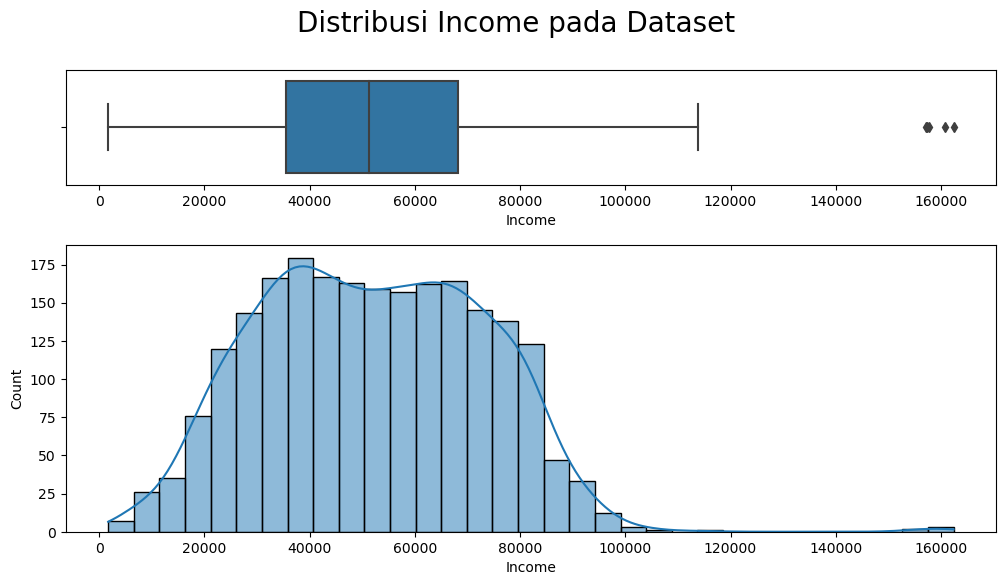

In [87]:
# Melihat distribusi data Income kembali yang dinyatakan memiliki missing value
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Income',ax=axes1)
sns.histplot(data=supermarket, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

<Axes: >

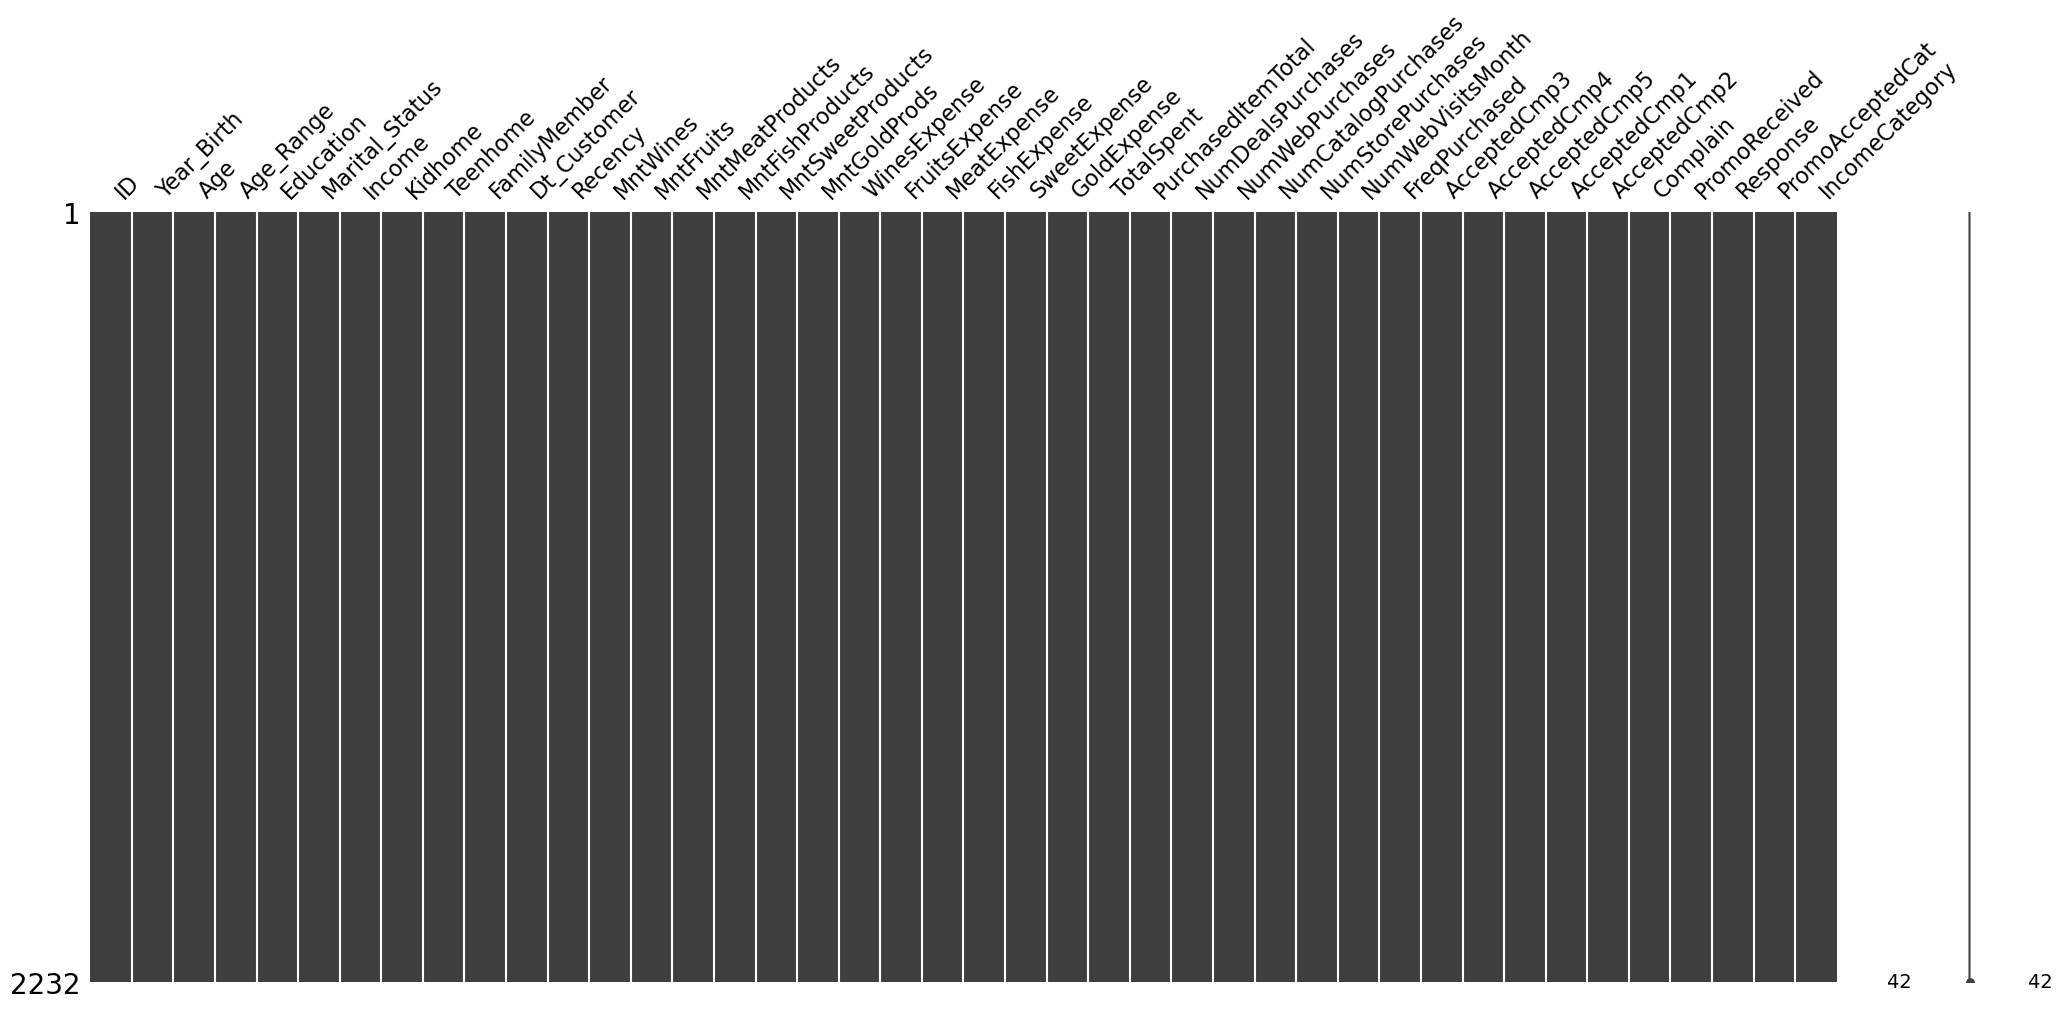

In [88]:
missingno.matrix(supermarket)

## Ringkasan Data Cleaning

In [89]:
supermarket[supermarket.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Age, Age_Range, Education, Marital_Status, Income, Kidhome, Teenhome, FamilyMember, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, WinesExpense, FruitsExpense, MeatExpense, FishExpense, SweetExpense, GoldExpense, TotalSpent, PurchasedItemTotal, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, FreqPurchased, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, PromoReceived, Response, PromoAcceptedCat, IncomeCategory]
Index: []

In [90]:
pd.set_option('display.max_columns', None)
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2235  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2237   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2239   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency  MntWines  \
0           0         0             1  2012-09-04       58       635   
1           1         1             3  2014-03-08       38        11   
2           0         0             2  2013-08-21       26       426   
3           1         0             3  2014-02-10       26        11   
4           1         0             3  2014-01-19       94       173   
...       ...       ...           ...         ...      ...       ...   
2235        0         1             3  2013-06-13       46       709   
2236        2         1             5  2014-06-10       56       406   
2237        0         0             1  2014-01-25       91       908   
2238        0         1             3  2014-01-24        8       428   
2239        1         1             4  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2235           247         22688            172          910        357.0   
2236             8         12992              0          150          0.0   
2237            24         29056            192         1085        272.0   
2238            61         13696            120         1070        680.0   
2239            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29                 422   
...

In [91]:
# Periksa seluruh tipe data, missing value, unique sample dari data yang sudah dilakukan pembersihan
pd.set_option('display.max_colwidth', None)
print(f'Total Rows {supermarket.shape[0]}, Total Column {supermarket.shape[1]}')
pd.DataFrame(
    {
    'Column Name': supermarket.columns.values,
    'Data Type': supermarket.dtypes.values,
    'Number of Unique': supermarket.nunique().values,
    'Missing Value':supermarket.isna().sum()/supermarket.shape[0]*100,
    'Unique Sample': [supermarket[col].unique() for col in supermarket.columns]
    }
).reset_index(drop=True)

Total Rows 2232, Total Column 42


Column Name       Data Type  Number of Unique  Missing Value  \
0                    ID           int64              2232            0.0   
1            Year_Birth           int64                56            0.0   
2                   Age           int64                56            0.0   
3             Age_Range          object                 4            0.0   
4             Education          object                 4            0.0   
5        Marital_Status          object                 4            0.0   
6                Income         float64              1972            0.0   
7               Kidhome           int64                 3            0.0   
8              Teenhome           int64                 3            0.0   
9          FamilyMember           int64                 5            0.0   
10          Dt_Customer  datetime64[ns]               663            0.0   
11              Recency           int64               100            0.0   
12             MntWines           int64               775            0.0   
13            MntFruits           int64               158            0.0   
14      MntMeatProducts           int64               557            0.0   
15      MntFishProducts           int64               182            0.0   
16     MntSweetProducts           int64               177            0.0   
17         MntGoldProds           int64               213            0.0   
18         WinesExpense           int64               775            0.0   
19        FruitsExpense           int64               158            0.0   
20          MeatExpense           int64               557            0.0   
21          FishExpense         float64               182            0.0   
22         SweetExpense         float64               177            0.0   
23          GoldExpense           int64               213            0.0   
24           TotalSpent         float64              2005            0.0   
25   PurchasedItemTotal           int64              1052            0.0   
26    NumDealsPurchases           int64                15            0.0   
27      NumWebPurchases           int64                15            0.0   
28  NumCatalogPurchases           int64                14            0.0   
29    NumStorePurchases           int64                14            0.0   
30    NumWebVisitsMonth           int64                15            0.0   
31        FreqPurchased           int64                38            0.0   
32         AcceptedCmp3           int64                 2            0.0   
33         AcceptedCmp4           int64                 2            0.0   
34         AcceptedCmp5           int64                 2            0.0   
35         AcceptedCmp1           int64                 2            0.0   
36         AcceptedCmp2           int64                 2            0.0   
37             Complain           int64                 2            0.0   
38        PromoReceived           int64                 6            0.0   
39             Response           int64                 2            0.0   
40     PromoAcceptedCat          object                 2            0.0   
41       IncomeCategory          object                 4            0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Dataset telah dilakukan pembersihan (Data Cleaning) dan peningkatan informasi. Adapun ringkasan (summary) sebagai berikut: 

1. Tipe data pada variabel/kolom ‘Dt_Customer’ sudah diubah menjad datetime64[ns]
2. Drop kolom (penghapusan kolom) 'Z_CostContact' dan'Z_Revenue'
3. Mengganti ID bernilai 0 dengan Random ID
4. Perbaikan komposisi data pada variabel/kolom 'Marital_Status' telah menjadi 4 kategori (Married, Cohabitation, Single dan Divorced) dan 'Education' menjadi 4 kategori (Bachelor, Master, Doctoral, Non-degree)
5. Menambahkan kolom baru guna mempermudah proses analsis (‘Age’, 'FamilyMember', 'WinesExpense' , 'FruitsExpense', 'MeatExpense', 'FishExpense', 'SweetExpense', 'GoldExpense', 'PurchasedItemTotal', 'FreqPurchased', 'PromoReceived', 'PromoAcceptedCat', 'Age_Range', 'IncomeCategory')
6. Menghapus (Drop) kolom abnormal berdasarkan temuan pada kolom  'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', namun tidak pernah ada data berbelanja (checkout) pada semua data Number of Purchase
7. Menghapus Outliers pada kolom ‘Income’ dan ‘Age’
8. Melakukan inputasi missing values pada kolom ‘Income’ dengan nilai median berdasarkan ’Age_Range’,  ‘Education’, ‘Marital_Status’ yang sudah dilakukan uji normalitas pada distribusi datanya

Perubahan shape data sebelum dan sesudah :
> Before: Total Baris 2240, Total Kolom 29

> After: Total Baris 2232, Total Kolom 42



In [209]:
# save to csv

supermarket.to_csv('supermarket_dataclean.csv', index=False)

# **Exploratory Data Analysis (EDA) Part.2**

Pada tahap EDA ini akan dimulai dari analisis dasar melalui seluruh tipe data

In [4]:
smdata = pd.read_csv('supermarket_dataclean.csv')

smdata

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2227  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2228   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2229   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2230   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2231   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember  ... PromoReceived  Response  \
0           0         0             1  ...             1         1   
1           1         1             3  ...             0         0   
2           0         0             2  ...             0         0   
3           1         0             3  ...             0         0   
4           1         0             3  ...             0         0   
...       ...       ...           ...  ...           ...       ...   
2227        0         1             3  ...             0         0   
2228        2         1             5  ...             1         0   
2229        0         0             1  ...             1         0   
2230        0         1             3  ...             0         0   
2231        1         1             4  ...             1         1   

           PromoAcceptedCat  IncomeCategory  Recency_y  Frequency  Monetary  \
0           Accepted promos    Upper-Middle         58         25  25943.76   
1     Never accepted promos    Lower-Middle         38          6    465.27   
2     Never accepted promos           Upper         26         21  15874.17   
3     Never accepted promos           Lower         26          8    609.81   
4     Never accepted promos    Upper-Middle         94         19   6900.29   
...                     ...             ...        ...        ...       ...   
2227  Never accepted promos    Upper-Middle         46         18  26864.86   
2228        Accepted promos    Upper-Middle         56         22  13222.00   
2229        Accepted promos    Upper-Middle         91         19  30872.24   
2230  Never accepted promos           Upper          8         23  16244.10   
2231        Accepted promos    Upper-Middle         40         11   3234.27   

      RFM Segment  RFM Score           RFM Level  
0             204          6      Need Attention  
1             321          6      Need Attention  
2             303          6      Need Attention  
3             321          6      Need Attention  
4             132          6      Need Attention  
...           ...        ...                 ...  
2227          334         10      Loyal Customer  
2228          203          5      Need Attention  
2229          134          8  Promising Customer  
2230          403          7  Promising Customer  
2231          332          8  Promising Customer  

[2232 rows x 48 columns]

## **Analisis Statistik Deskriptif Data**

In [95]:
pd.set_option('display.max_columns', None)
display(smdata.describe(),smdata.describe(include='object'))

ID   Year_Birth          Age         Income      Kidhome  \
count   2232.000000  2232.000000  2232.000000    2232.000000  2232.000000   
mean    5587.589158  1968.904122    45.095878   51889.141353     0.444444   
std     3241.158983    11.704862    11.704862   21172.229052     0.538567   
min        1.000000  1940.000000    18.000000    1730.000000     0.000000   
25%     2828.250000  1959.000000    37.000000   35502.500000     0.000000   
50%     5454.500000  1970.000000    44.000000   51369.000000     0.000000   
75%     8418.500000  1977.000000    55.000000   68179.500000     1.000000   
max    11191.000000  1996.000000    74.000000  162397.000000     2.000000   

          Teenhome  FamilyMember      Recency     MntWines    MntFruits  \
count  2232.000000   2232.000000  2232.000000  2232.000000  2232.000000   
mean      0.507616      2.597670    49.095878   304.669355    26.321237   
std       0.544674      0.906846    28.958474   336.649594    39.745169   
min       0.000000      1.000000     0.000000     0.000000     0.000000   
25%       0.000000      2.000000    24.000000    24.000000     2.000000   
50%       0.000000      3.000000    49.000000   175.500000     8.000000   
75%       1.000000      3.000000    74.000000   505.000000    33.000000   
max       2.000000      5.000000    99.000000  1493.000000   199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2232.000000      2232.000000       2232.000000   2232.000000   
mean        167.280466        37.602151         27.128136     44.060036   
std         225.782647        54.675305         41.321152     52.076367   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          68.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.250000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   

       WinesExpense  FruitsExpense  MeatExpense  FishExpense  SweetExpense  \
count   2232.000000    2232.000000  2232.000000  2232.000000   2232.000000   
mean    9749.419355     105.284946   836.402330   319.618280     61.580869   
std    10772.787018     158.980677  1128.913237   464.740089     93.799016   
min        0.000000       0.000000     0.000000     0.000000      0.000000   
25%      768.000000       8.000000    80.000000    25.500000      2.270000   
50%     5616.000000      32.000000   340.000000   102.000000     18.160000   
75%    16160.000000     132.000000  1160.000000   425.000000     75.477500   
max    47776.000000     796.000000  8625.000000  2201.500000    597.010000   

       GoldExpense    TotalSpent  PurchasedItemTotal  NumDealsPurchases  \
count  2232.000000   2232.000000         2232.000000        2232.000000   
mean    440.600358  11512.906138          607.061380           2.330197   
std     520.763669  11987.184319          601.868004           1.932251   
min       0.000000     71.770000            8.000000           0.000000   
25%      90.000000   1017.000000           69.000000           1.000000   
50%     240.000000   7098.695000          397.000000           2.000000   
75%     560.000000  19062.572500         1047.250000           3.000000   
max    3620.000000  51869.610000         2525.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2232.000000          2232.000000        2232.000000   
mean          4.094982             2.668011           5.806004   
std           2.777080             2.924341           3.244759   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000  

Age_Range Education Marital_Status Dt_Customer  \
count          2232      2232           2232        2232   
unique            4         4              4         663   
top     Millennials  Bachelor        Married  2012-08-31   
freq            937      1123            863          12   

             PromoAcceptedCat IncomeCategory  
count                    2232           2232  
unique                      2              4  
top     Never accepted promos          Upper  
freq                     1624            576

Analisis Statistik Deskripsi Data :

Didapati bahwa jumlah data yang dimiliki yakni sebanyak 2232 data dan 30 variabel yang dapat diketahui dari jumlah baris dan kolom yang ada. Berikut juga beberapa poin yang bisa dijadikan bahan analisa yang disesuaikan dengan rumusan masalah: 
1. Untuk distribusi data setelah melihat dari statistika deskriptif nampak terlihat distribusi tidak normal bisa dilihat dari nilai quantile yang di bandingkan dengan data nilai min/max terpaut cukup jauh sehingga ada praduga distribusi data tidak normal. Akan diperiksa kembali pada analisa distribusi data
2. Pada statistika deskriptif data kategorik mendapatkan beberapa insight untuk mendalami analisa lebih lanjut. Contoh seperti pada kolom  ‘PromoAcceptedCat’ diketahui  top frekuensi yang ‘Never accepted promos’ terbanyak dari sebaran data yang lain maka ini menarik untuk dianalisa karena bertujuan untuk mendapatkan jawaban terkait efektifitas promosi/campaign pada supermarket.


## **Analisis Distribusi Data**

In [94]:
numerikal = smdata.select_dtypes(include='number')

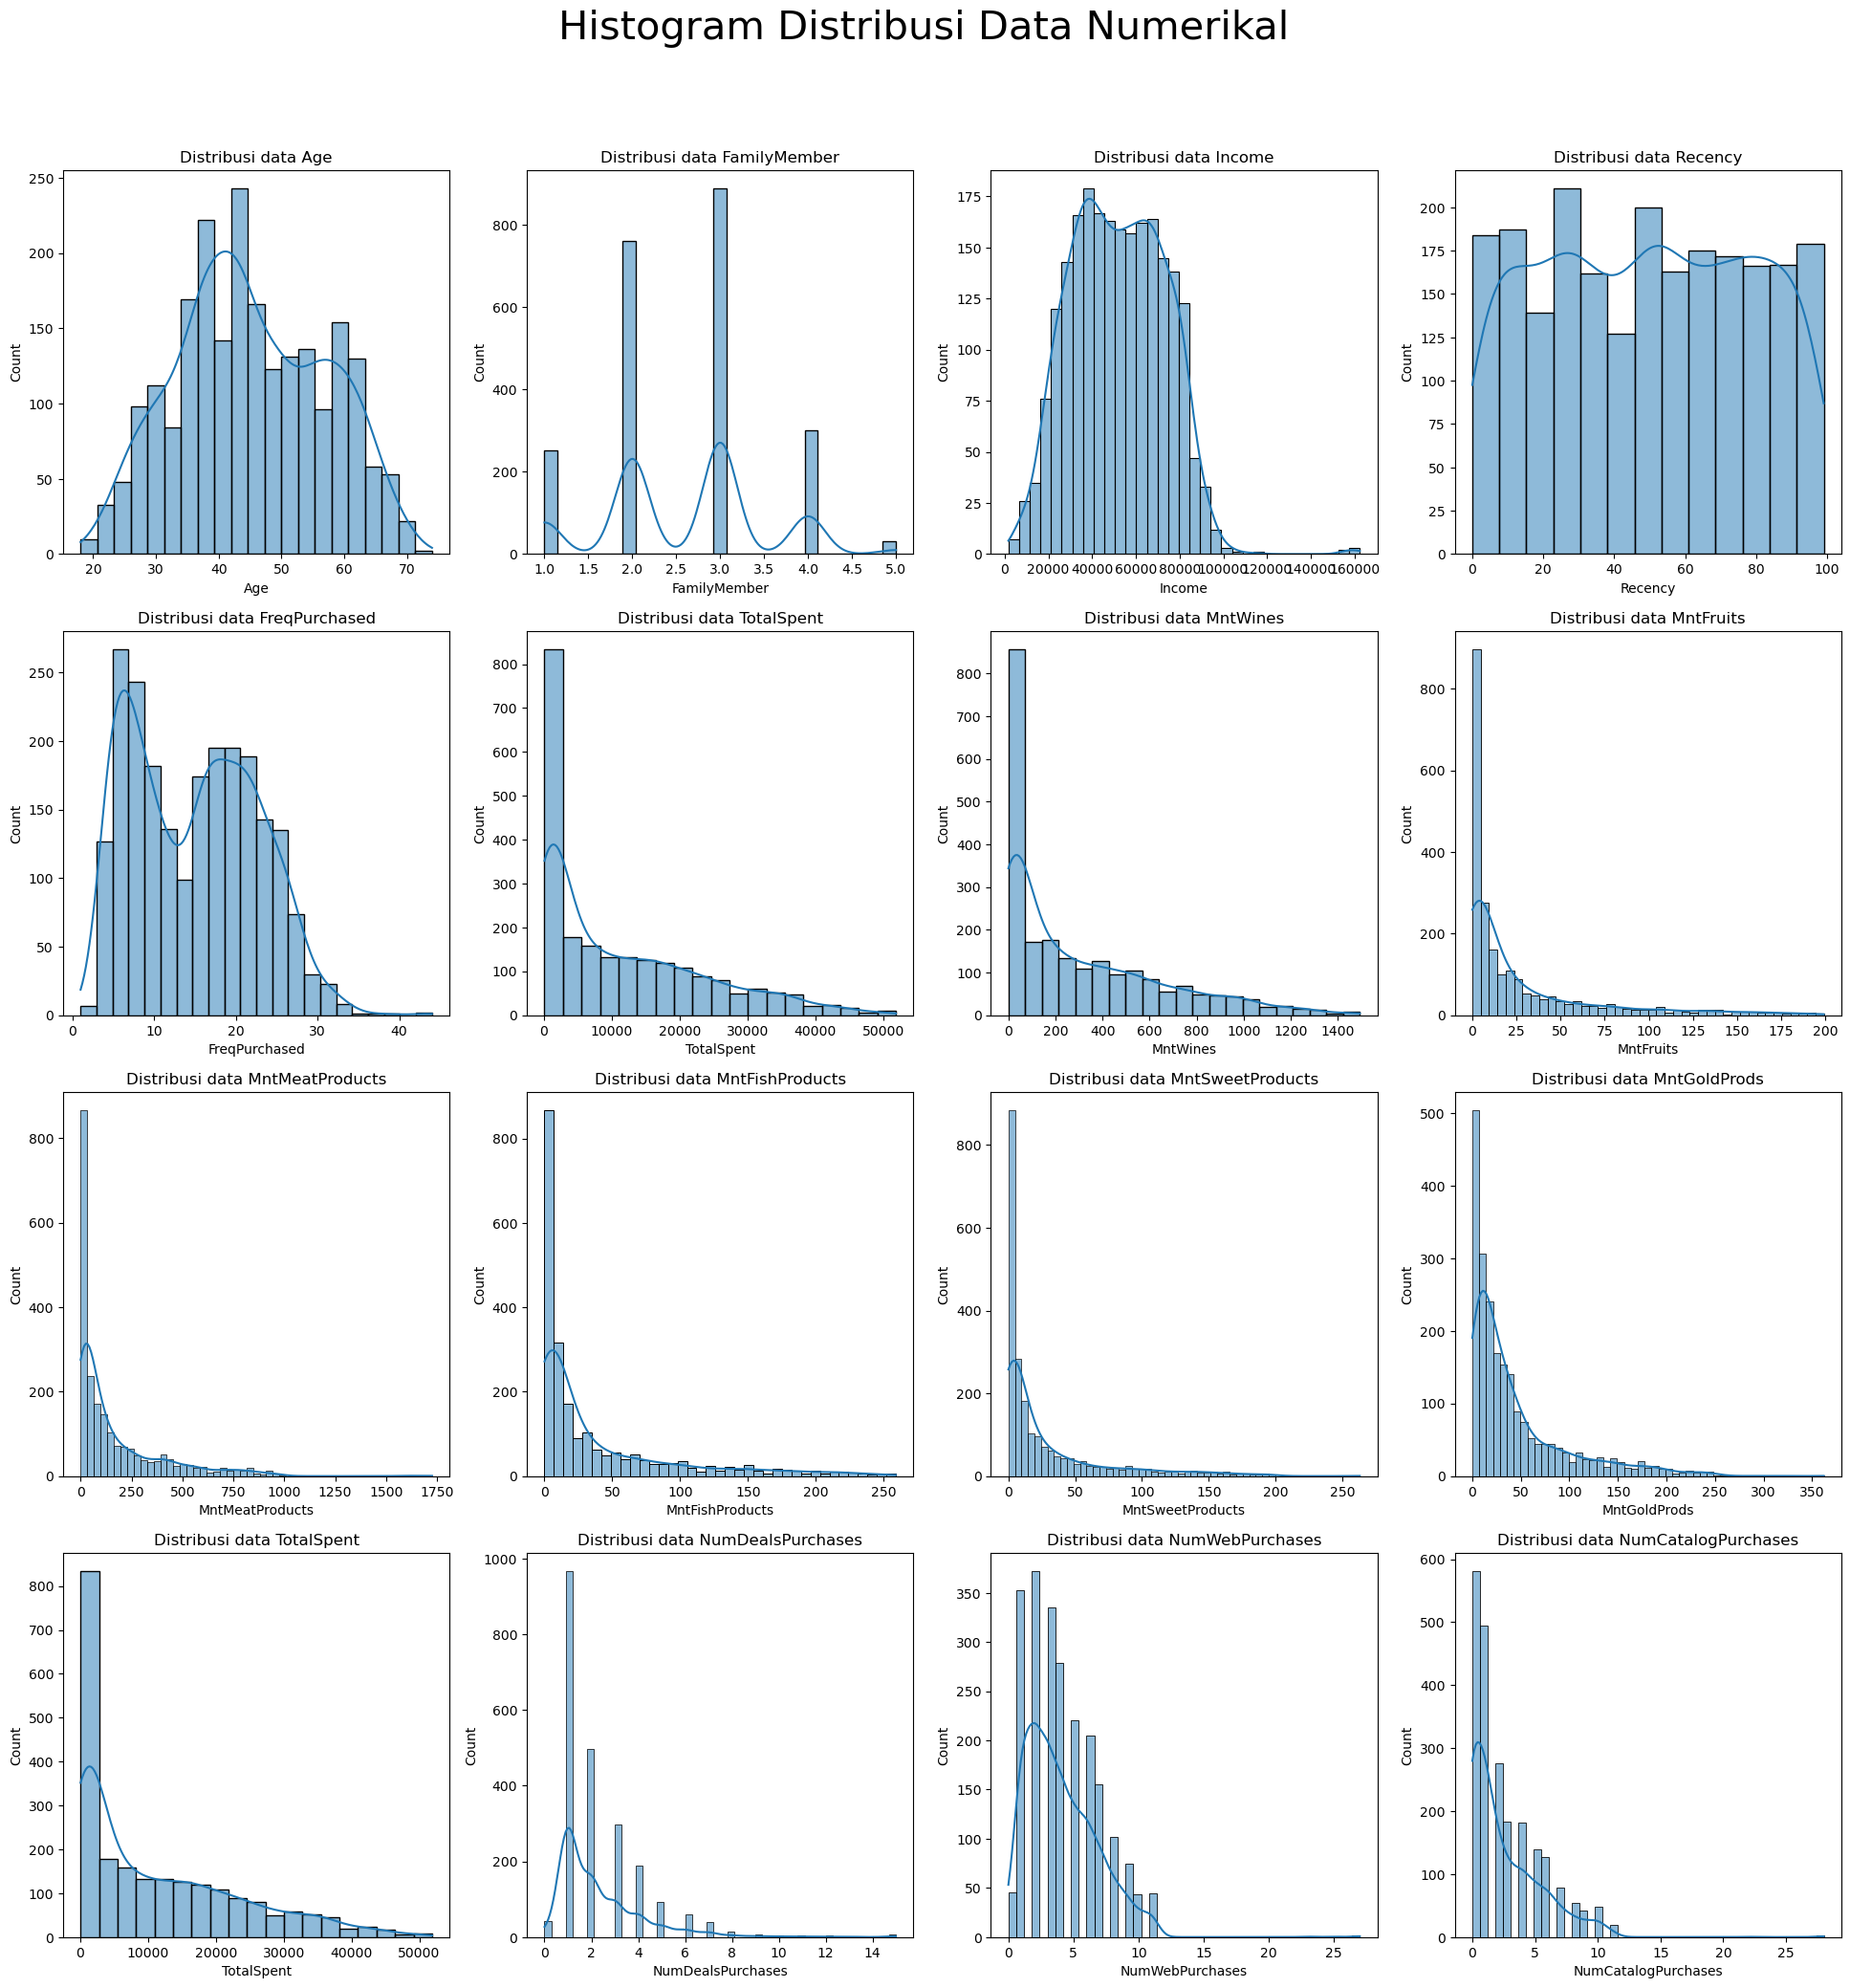

In [99]:
listKolomclean = ['Age','FamilyMember','Income','Recency','FreqPurchased','TotalSpent','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','TotalSpent','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','PromoReceived']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==19 : 
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=smdata, x=listKolomclean[kolom], kde=True)
            plt.title(f'Distribusi data {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Histogram Distribusi Data Numerikal', size=30, y=0.95)
plt.show()

**Analisis Histogram Distribusi Data**
- Kolom 'Age' menunjukkan distribusi yang mengikuti kurva pyramid khas distribusi normal (normalitas akan diperiksa pada bagian berikutnya).
- Kolom-kolom yang mewakili pengeluaran untuk setiap produk dan total pengeluaran menunjukkan kurva dengan kecenderungan sentral di sekitar 0. Hal ini dikarenakan banyak pengguna yang tidak membeli produk tertentu sama sekali, namun mungkin membeli produk lain.
- Kolom-kolom lainnya menunjukkan distribusi yang relatif acak, dan normalitasnya akan diperiksa pada bagian berikutnya.

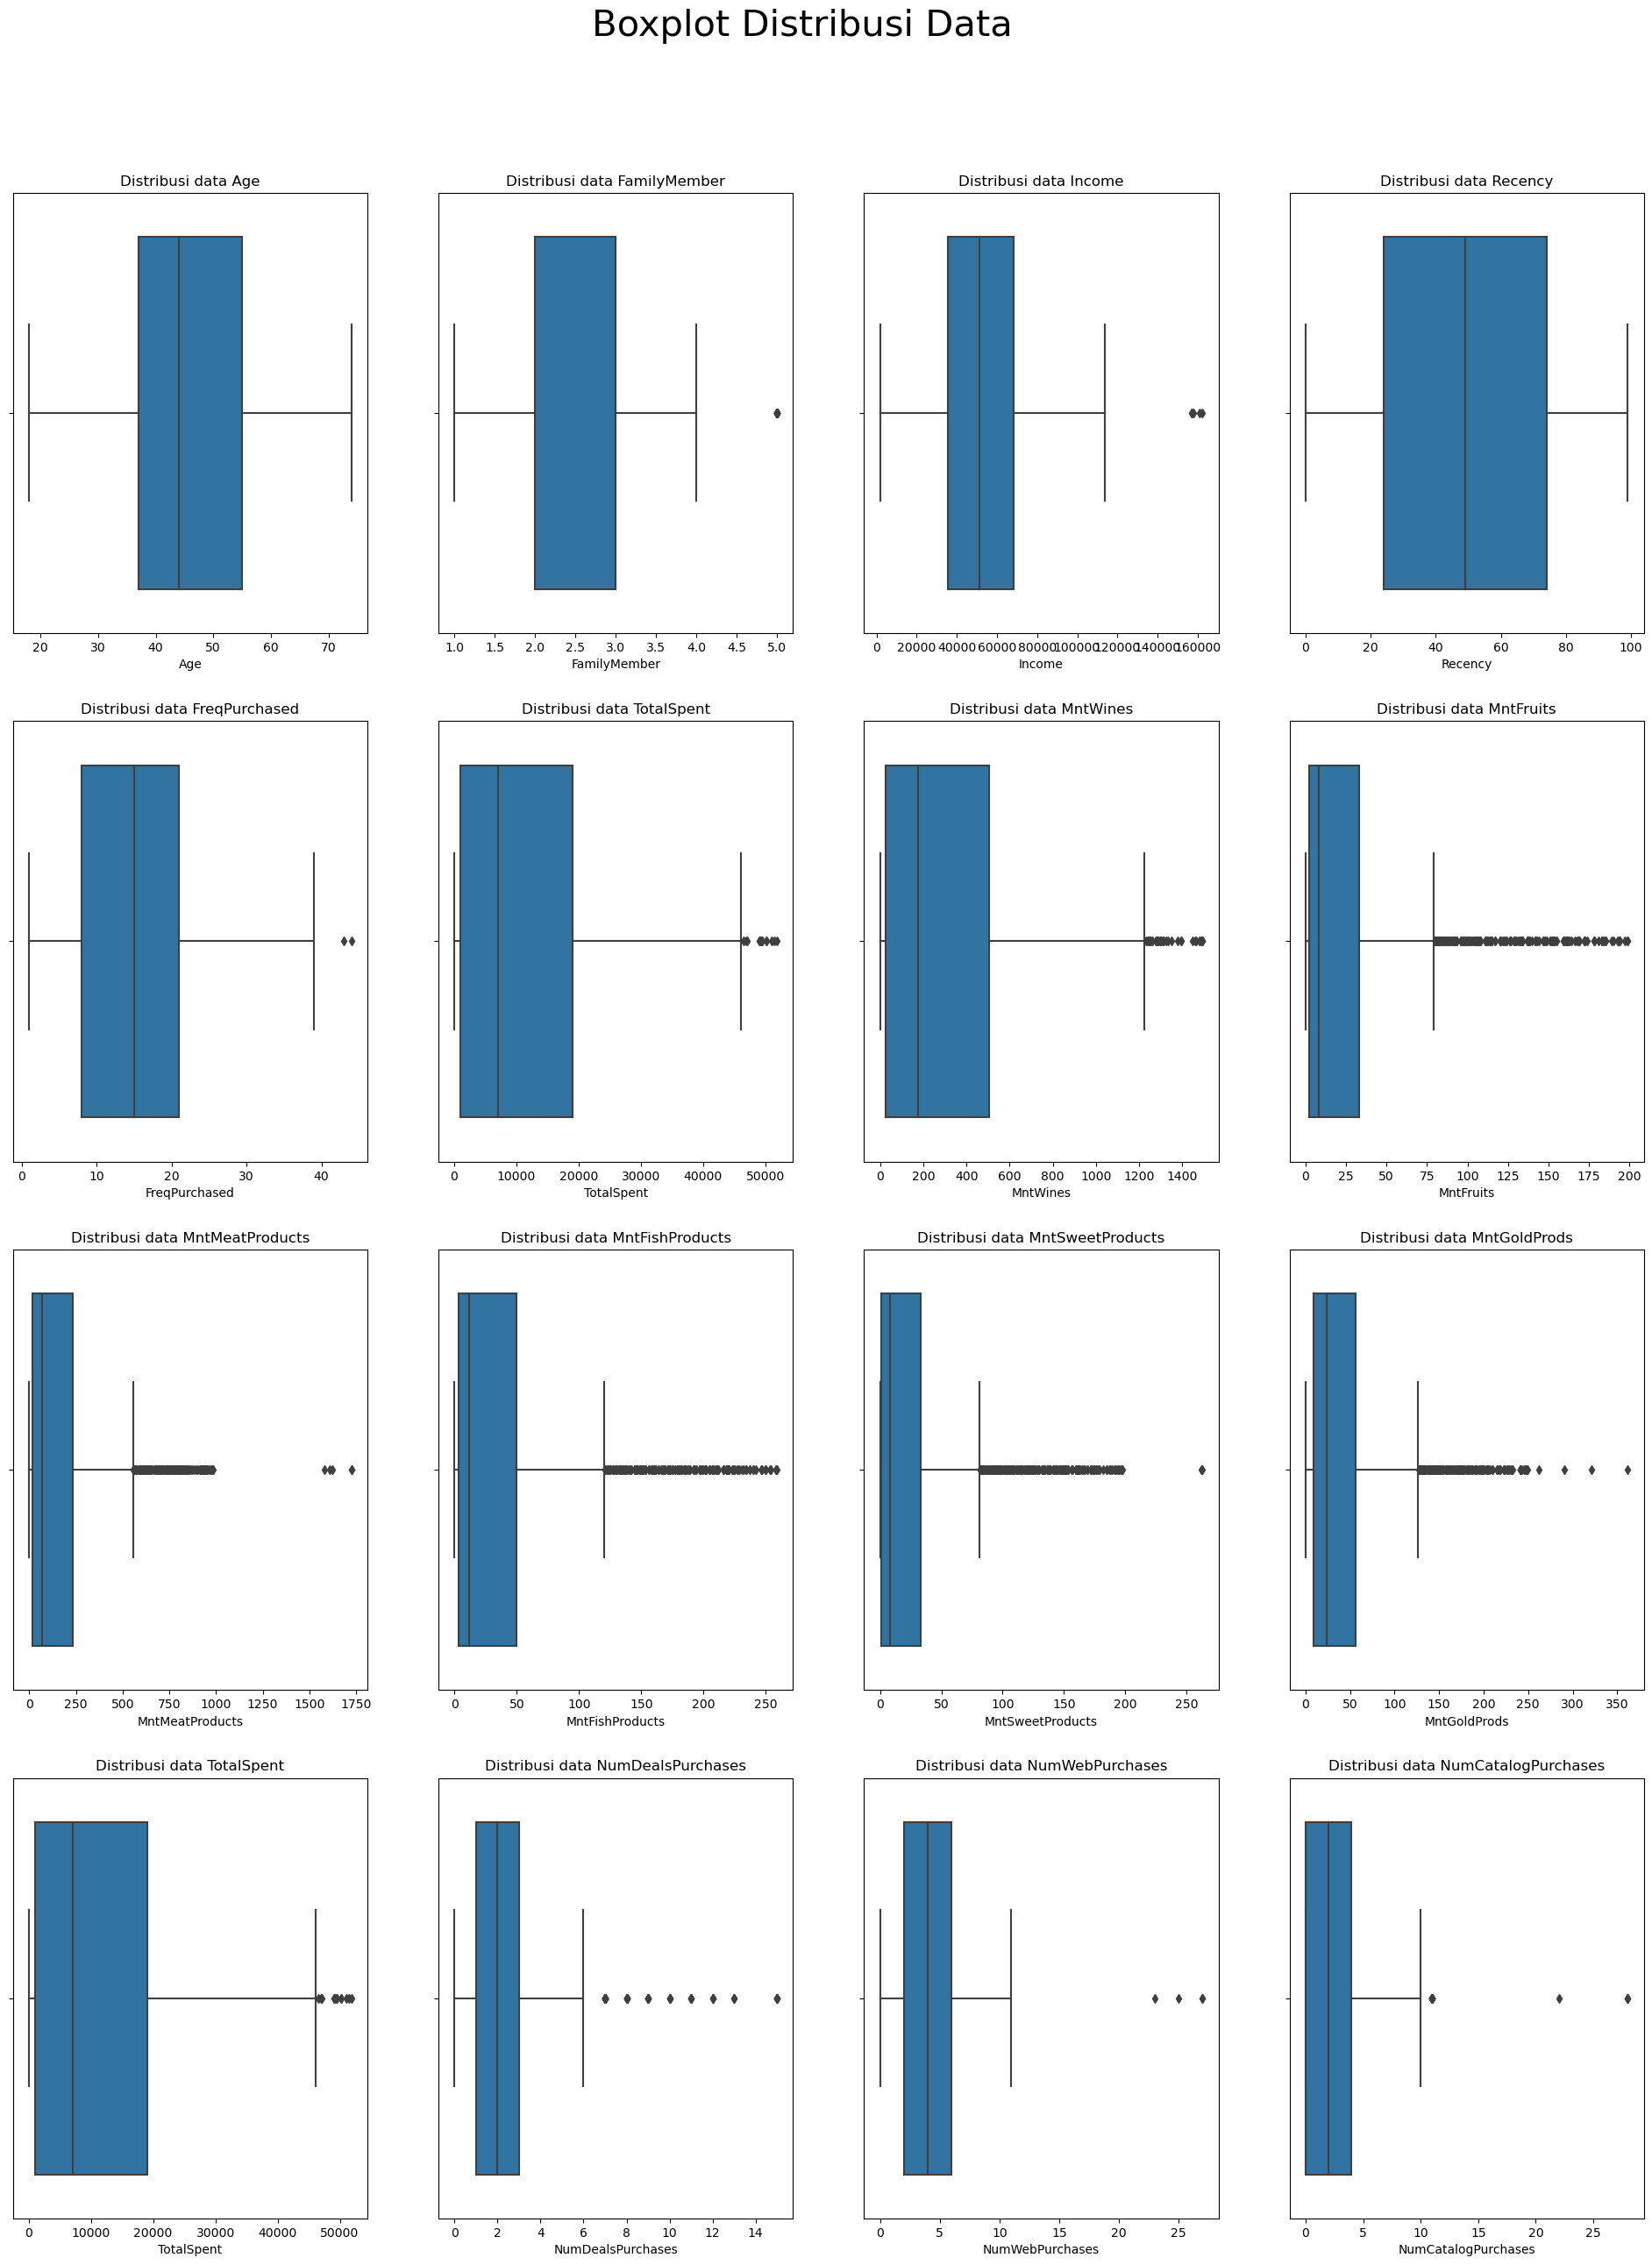

In [101]:
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,30))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==20 :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=smdata, x=listKolomclean[kolom])
            plt.title(f'Distribusi data {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Boxplot Distribusi Data', size=30, y=0.95)
plt.show()

**Analisis Boxplot Distribusi Data**
- Di semua data outliers hampir tidak ada. Hal ini dikarenakan nilai minimumnya adalah 0 (tidak ada nilai negatif), sehingga beberapa batas bawah lebih kecil dari (Q1 - 1,5 IQR).
- Kolom 'TotalSpent' untuk setiap produk memiliki jumlah pencilan kanan yang signifikan. Hal ini dikarenakan beberapa pelanggan sangat menyukai produk tertentu, sehingga mereka membelinya dalam jumlah yang jauh lebih besar daripada rata-rata orang lainnya.
- Kolom 'Age', 'Recency' dan 'NumStorePurchases' tidak memiliki pencilan.

## **Periksa Normalitas**

In [102]:
listpvalue = []
listStatusNormal = []
for i in listKolomclean :
    stat,pvalue=shapiro(numerikal[i])
    if pvalue<=0.05:
        status = 'Distribusi Data Tidak Normal'
    else: 
        status = 'Distribusi Data Normal' 
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [103]:
Normalitasclean = pd.DataFrame({
    'Column Name' : listKolomclean,
    'Pvalue' : listpvalue,
    'Status Normalitas' : listStatusNormal
})
Normalitasclean

Column Name        Pvalue             Status Normalitas
0                   Age  1.766947e-15  Distribusi Data Tidak Normal
1          FamilyMember  6.322000e-37  Distribusi Data Tidak Normal
2                Income  7.595262e-18  Distribusi Data Tidak Normal
3               Recency  6.351163e-26  Distribusi Data Tidak Normal
4         FreqPurchased  2.355675e-26  Distribusi Data Tidak Normal
5            TotalSpent  3.844322e-41  Distribusi Data Tidak Normal
6              MntWines  7.651090e-43  Distribusi Data Tidak Normal
7             MntFruits  0.000000e+00  Distribusi Data Tidak Normal
8       MntMeatProducts  0.000000e+00  Distribusi Data Tidak Normal
9       MntFishProducts  0.000000e+00  Distribusi Data Tidak Normal
10     MntSweetProducts  0.000000e+00  Distribusi Data Tidak Normal
11         MntGoldProds  0.000000e+00  Distribusi Data Tidak Normal
12           TotalSpent  3.844322e-41  Distribusi Data Tidak Normal
13    NumDealsPurchases  0.000000e+00  Distribusi Data Tidak Normal
14      NumWebPurchases  2.916316e-36  Distribusi Data Tidak Normal
15  NumCatalogPurchases  5.605194e-45  Distribusi Data Tidak Normal
16    NumStorePurchases  1.676991e-35  Distribusi Data Tidak Normal
17    NumWebVisitsMonth  2.098591e-31  Distribusi Data Tidak Normal
18        PromoReceived  0.000000e+00  Distribusi Data Tidak Normal

**Analisis Normalitas Distribusi Data:**
1. Dapat dilihat dari hasil uji normalitas menggunakan metode shapiro wilk menghasilkan seluruh data tidak normal distribusinya
2. Semua uji statistik selanjutnya dalam analisis akan menggunakan uji non-parametrik.
3. Untuk membandingkan nilai antar kategori, nilai median akan digunakan untuk semua kolom.

# **Data Analisis**

## **Analisis RFM**

RFM merupakan metode analisis mempertimbangkan kebiasaan membeli konsumen, termasuk keterkinian, frekuensi, dan nilai moneter. Bisa juga jenis segmentasi pelanggan dan penargetan perilaku yang digunakan untuk membantu bisnis menentukan peringkat dan mengelompokkan pelanggan berdasarkan keterkinian, frekuensi, dan nilai moneter suatu transaksi. Seperti halnya pada rumusan masalah yang pertama yakni :
1. Bagaimana segmentasi pelanggan berdasarkan kebiasaan mereka melakukan pembelian (recency), frekuensi, dan keuangan/transaki?

dari rumusan masalah tersebut metode RFM yang akan digunakan untuk menganalisis.

Pada metode RFM dibutuhkan 3 tabel utama yaitu Recency, Frequency & Monetary. Recency telah tersedia, namun untuk kedua tabel akan di definisikan dari tabel 'FreqPurchased' dan 'TotalSpent'

### Membuat Tabel RFM

In [105]:
# Create RFM table
rfmtable = smdata[['ID','Recency','FreqPurchased','TotalSpent']]
rfmtable

ID  Recency  FreqPurchased  TotalSpent
0      5524       58             25    25943.76
1      2174       38              6      465.27
2      4141       26             21    15874.17
3      6182       26              8      609.81
4      5324       94             19     6900.29
...     ...      ...            ...         ...
2227  10870       46             18    26864.86
2228   4001       56             22    13222.00
2229   7270       91             19    30872.24
2230   8235        8             23    16244.10
2231   9405       40             11     3234.27

[2232 rows x 4 columns]

In [106]:
rfmtable.set_index('ID',inplace=True)
rfmtable

Recency  FreqPurchased  TotalSpent
ID                                       
5524        58             25    25943.76
2174        38              6      465.27
4141        26             21    15874.17
6182        26              8      609.81
5324        94             19     6900.29
...        ...            ...         ...
10870       46             18    26864.86
4001        56             22    13222.00
7270        91             19    30872.24
8235         8             23    16244.10
9405        40             11     3234.27

[2232 rows x 3 columns]

In [107]:
newrfmtablename = { 'FreqPurchased': 'Frequency','TotalSpent': 'Monetary'}
rfmtable.rename(columns=newrfmtablename,inplace=True)
rfmtable

Recency  Frequency  Monetary
ID                                 
5524        58         25  25943.76
2174        38          6    465.27
4141        26         21  15874.17
6182        26          8    609.81
5324        94         19   6900.29
...        ...        ...       ...
10870       46         18  26864.86
4001        56         22  13222.00
7270        91         19  30872.24
8235         8         23  16244.10
9405        40         11   3234.27

[2232 rows x 3 columns]

### Cek Distribusi dan Deskriptif Data RFM

In [108]:
rfmtable.describe()

Recency    Frequency      Monetary
count  2232.000000  2232.000000   2232.000000
mean     49.095878    14.899194  11512.906138
std      28.958474     7.658860  11987.184319
min       0.000000     1.000000     71.770000
25%      24.000000     8.000000   1017.000000
50%      49.000000    15.000000   7098.695000
75%      74.000000    21.000000  19062.572500
max      99.000000    44.000000  51869.610000

Recency Distribusi

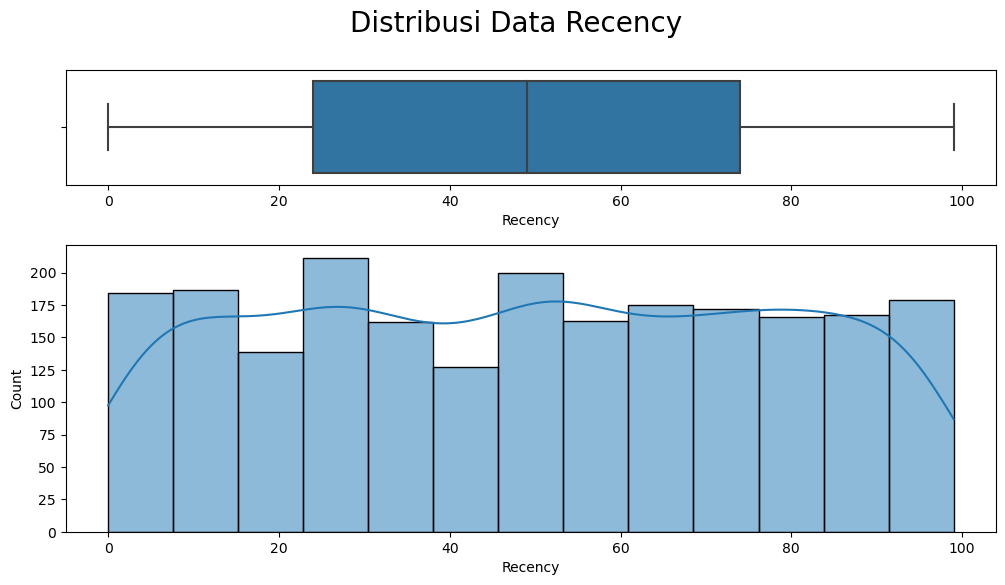

In [109]:
# Melihat distribusi data Recency
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=rfmtable, x='Recency',ax=axes1)
sns.histplot(data=rfmtable, x='Recency', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Recency', size = 20)
plt.show()

Frequency Distribusi

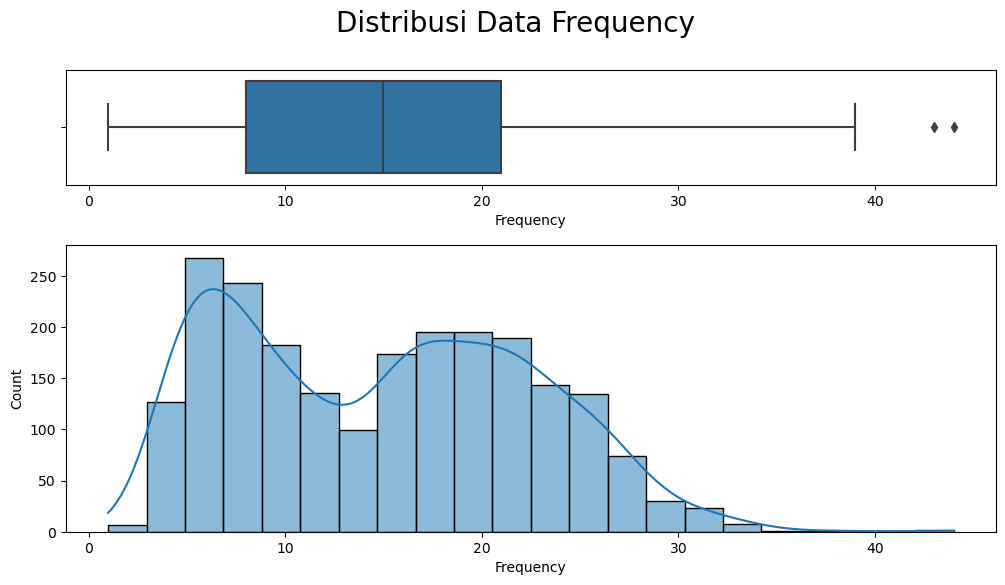

In [110]:
# Melihat distribusi data Frequency
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=rfmtable, x='Frequency',ax=axes1)
sns.histplot(data=rfmtable, x='Frequency', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Frequency', size = 20)
plt.show()

Monetary Distribusi

In [111]:
# Melihat distribusi data Frequency
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=rfmtable, x='Monetary',ax=axes1)
sns.histplot(data=rfmtable, x='Monetary', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Monetary', size = 20)
plt.show()

In [140]:
rfmtable.drop(['RFM Segment'], axis = 1,inplace=True)
#rfmtable.drop(['RFM Score'], axis = 1,inplace=True)

### RFM Segmentation

In [138]:
rfmtable.describe()

Recency    Frequency      Monetary
count  2232.000000  2232.000000   2232.000000
mean     49.095878    14.899194  11512.906138
std      28.958474     7.658860  11987.184319
min       0.000000     1.000000     71.770000
25%      24.000000     8.000000   1017.000000
50%      49.000000    15.000000   7098.695000
75%      74.000000    21.000000  19062.572500
max      99.000000    44.000000  51869.610000

In [141]:
def rfm_segment(baris):
    # Initialize variables with default values
    rscore = 0
    fscore = 0
    mscore = 0

    # Recency
    # Label score segment based on deskriptif statistik quantile
    if baris['Recency'] <= 24:
        rscore = 4
    elif (baris['Recency'] >= 24) and (baris['Recency'] <= 49):
        rscore = 3
    elif (baris['Recency'] >= 49) and (baris['Recency'] <= 74):
        rscore = 2
    elif baris['Recency'] > 74:
        rscore = 1
    
    # Frequency
    # Label score segment optional (tidak harus berdasarkan deskriptif statistik)
    if baris['Frequency'] <= 5:
        fscore = 1
    elif (baris['Frequency'] >= 5) and (baris['Frequency'] <= 10):
        fscore = 2
    elif (baris['Frequency'] >= 10) and (baris['Frequency'] <= 20):
        fscore = 3
    elif baris['Frequency'] > 40:
        fscore = 4

    # Monetary
    # Label score segment based on deskriptif statistik quantile
    if baris['Monetary'] <= 1017:
        mscore = 1
    elif (baris['Monetary'] >= 1017) and (baris['Monetary'] <= 7098.695):
        mscore = 2
    elif (baris['Monetary'] >= 7098.695) and (baris['Monetary'] <= 19062.5725):
        mscore = 3
    elif baris['Monetary'] > 19062.5725:
        mscore = 4
    return str(rscore) + str(fscore) + str(mscore)


rfmtable['RFM Segment']= rfmtable.apply(rfm_segment, axis =1)
rfmtable

Recency  Frequency  Monetary RFM Segment
ID                                             
5524        58         25  25943.76         204
2174        38          6    465.27         321
4141        26         21  15874.17         303
6182        26          8    609.81         321
5324        94         19   6900.29         132
...        ...        ...       ...         ...
10870       46         18  26864.86         334
4001        56         22  13222.00         203
7270        91         19  30872.24         134
8235         8         23  16244.10         403
9405        40         11   3234.27         332

[2232 rows x 4 columns]

In [142]:
Persentase_RFMSegment = pd.DataFrame((rfmtable['RFM Segment'].value_counts() / len(rfmtable) *100).head(20))
Persentase_RFMSegment


count
RFM Segment          
104          4.256272
304          4.166667
233          4.077061
204          4.032258
321          3.942652
433          3.449821
122          3.449821
411          3.360215
403          3.270609
121          3.136201
333          3.136201
404          3.136201
132          3.091398
203          3.046595
432          3.046595
421          3.046595
133          3.046595
232          2.956989
422          2.867384
222          2.822581

### RFM Score

In [143]:
def rfm_score(baris):
    # Initialize variables with default values
    rscore = 0
    fscore = 0
    mscore = 0

    # Recency
    # Label score segment based on deskriptif statistik quantile
    if baris['Recency'] <= 24:
        rscore = 4
    elif (baris['Recency'] >= 24) and (baris['Recency'] <= 49):
        rscore = 3
    elif (baris['Recency'] >= 49) and (baris['Recency'] <= 74):
        rscore = 2
    elif baris['Recency'] > 74:
        rscore = 1
    
    # Frequency
    # Label score segment optional (tidak harus berdasarkan deskriptif statistik)
    if baris['Frequency'] <= 5:
        fscore = 1
    elif (baris['Frequency'] >= 5) and (baris['Frequency'] <= 10):
        fscore = 2
    elif (baris['Frequency'] >= 10) and (baris['Frequency'] <= 20):
        fscore = 3
    elif baris['Frequency'] > 40:
        fscore = 4

    # Monetary
    # Label score segment based on deskriptif statistik quantile
    if baris['Monetary'] <= 1017:
        mscore = 1
    elif (baris['Monetary'] >= 1017) and (baris['Monetary'] <= 7098.695):
        mscore = 2
    elif (baris['Monetary'] >= 7098.695) and (baris['Monetary'] <= 19062.5725):
        mscore = 3
    elif baris['Monetary'] > 19062.5725:
        mscore = 4
    
    return rscore + fscore + mscore


rfmtable['RFM Score']= rfmtable.apply(rfm_score, axis =1)
rfmtable

Recency  Frequency  Monetary RFM Segment  RFM Score
ID                                                        
5524        58         25  25943.76         204          6
2174        38          6    465.27         321          6
4141        26         21  15874.17         303          6
6182        26          8    609.81         321          6
5324        94         19   6900.29         132          6
...        ...        ...       ...         ...        ...
10870       46         18  26864.86         334         10
4001        56         22  13222.00         203          5
7270        91         19  30872.24         134          8
8235         8         23  16244.10         403          7
9405        40         11   3234.27         332          8

[2232 rows x 5 columns]

In [145]:
rfmtable.sort_values(by='RFM Score',ascending=False)

Recency  Frequency  Monetary RFM Segment  RFM Score
ID                                                        
1740        22         16  25817.43         434         11
5547         9         20  49430.13         434         11
9595         1         14  22474.00         434         11
2407        10         20  30800.83         434         11
7233         4         16  23580.46         434         11
...        ...        ...       ...         ...        ...
5577        77          4    350.27         111          3
10304       77          5    625.58         111          3
4351        90          5    884.00         111          3
2106        99          5    232.12         111          3
2549        80          5    599.00         111          3

[2232 rows x 5 columns]

<Axes: xlabel='RFM Score', ylabel='Count'>

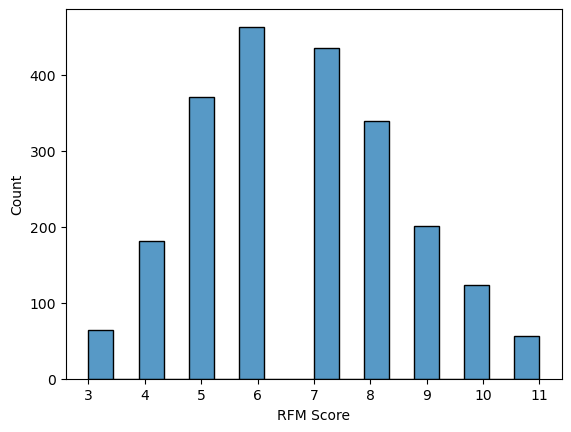

In [146]:
sns.histplot(rfmtable['RFM Score'])

### RFM Level

In [147]:
rfmtable.describe()

Recency    Frequency      Monetary    RFM Score
count  2232.000000  2232.000000   2232.000000  2232.000000
mean     49.095878    14.899194  11512.906138     6.700717
std      28.958474     7.658860  11987.184319     1.838636
min       0.000000     1.000000     71.770000     3.000000
25%      24.000000     8.000000   1017.000000     5.000000
50%      49.000000    15.000000   7098.695000     7.000000
75%      74.000000    21.000000  19062.572500     8.000000
max      99.000000    44.000000  51869.610000    11.000000

In [148]:
def rfm_level(baris):
    if baris['RFM Score'] >= 11:
        return 'Champions Customer'
    elif (baris['RFM Score'] < 11) and (baris['RFM Score'] >= 9):
        return 'Loyal Customer'
    elif (baris['RFM Score'] < 9) and (baris['RFM Score'] >= 7):
        return 'Promising Customer'
    elif (baris['RFM Score'] < 7) and (baris['RFM Score'] >= 4):
        return 'Need Attention'
    else:
        return 'Almost Lost Customer'

rfmtable['RFM Level']= rfmtable.apply(rfm_level, axis =1)
rfmtable

Recency  Frequency  Monetary RFM Segment  RFM Score           RFM Level
ID                                                                            
5524        58         25  25943.76         204          6      Need Attention
2174        38          6    465.27         321          6      Need Attention
4141        26         21  15874.17         303          6      Need Attention
6182        26          8    609.81         321          6      Need Attention
5324        94         19   6900.29         132          6      Need Attention
...        ...        ...       ...         ...        ...                 ...
10870       46         18  26864.86         334         10      Loyal Customer
4001        56         22  13222.00         203          5      Need Attention
7270        91         19  30872.24         134          8  Promising Customer
8235         8         23  16244.10         403          7  Promising Customer
9405        40         11   3234.27         332          8  Promising Customer

[2232 rows x 6 columns]

In [169]:
pd.DataFrame(rfmtable['RFM Level'].value_counts())

count
RFM Level                  
Need Attention         1014
Promising Customer      774
Loyal Customer          324
Almost Lost Customer     64
Champions Customer       56

In [150]:
RFMlvl_df = pd.DataFrame(rfmtable['RFM Level'].value_counts()/len(rfmtable)*100)
RFMlvl_df

count
RFM Level                      
Need Attention        45.430108
Promising Customer    34.677419
Loyal Customer        14.516129
Almost Lost Customer   2.867384
Champions Customer     2.508961

In [151]:
RFMlvl_df.rename(columns={ 'count': 'Persentase'},inplace=True)

In [152]:
RFMlvl_df

Persentase
RFM Level                       
Need Attention         45.430108
Promising Customer     34.677419
Loyal Customer         14.516129
Almost Lost Customer    2.867384
Champions Customer      2.508961

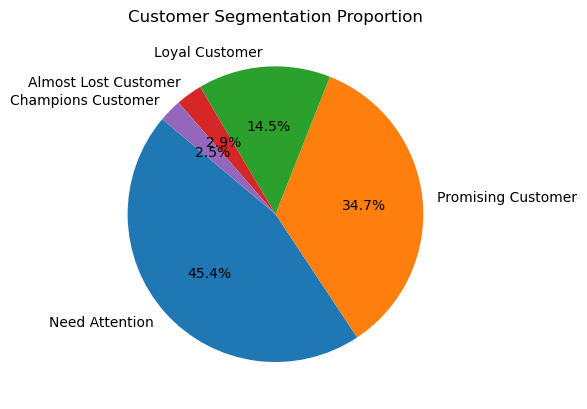

In [164]:
rfm_counts = rfmtable['RFM Level'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Customer Segmentation Proportion')
plt.show()

In [206]:
# Determine the number of slices
num_slices = len(rfm_counts)

# Define explode values based on the number of slices
explode = [0.1 if i == 0 else 0 for i in range(num_slices)]  # Explode the first slice (index 0) slightly


# Initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# Add title
fig.text(0, 1.05, "Customer Segmentation Proportion", fontsize=12, fontweight="bold")

# Create pie chart
plt.pie(rfm_counts,
        colors=['#fec11e', '#0072E4', '#FF5733', '#6AF9C4', '#F700FF'],  # Custom colors
        labels=['Need Attention', 'Promising Customer', 'Loyal Customer', 'Almost Lost Customer', 'Champions Customer'], 
        autopct='%1.1f%%',
        startangle=40,
        pctdistance=0.85,
        explode=explode,  # Use the calculated explode values
        textprops={"fontsize": 9.5})

# Create a circle at the center of the plot
fig.gca().add_artist(plt.Circle((-0.01, 0.055), 0.75, fc='white'))

# Show plot
plt.tight_layout()
plt.show()


Analisis Hasil RFM

Hasil RFM level yang telah dilakukan dapat menjawab dari rumusan masalah sebagai berikut:
1. Bagaimana segmentasi pelanggan berdasarkan kebiasaan mereka melakukan pembelian (recency), frekuensi, dan keuangan/transaksi?

Maka jawaban yang tepat yakni pada data RFM level yang telah disajikan pada figur/pie plot. Hasil tersebut juga bisa memberikan pandangan untuk actionable solution perusahaan pada customer dengan segmentasi level ‘Promising Customer’ dan ‘Need Attention'.

Dengan memahami bagaimana pelanggan mereka tersegmentasi, perusahaan dapat mengembangkan kampanye pemasaran yang ditargetkan dan meningkatkan upaya layanan pelanggan mereka.

NOTE Hasil Segmentasi
* **Champions Customer**: Ini adalah pelanggan yang paling berharga, karena mereka baru-baru ini sering membeli dan dalam jumlah besar.
* **Loyal Customer**: Pelanggan ini telah sering membeli dan dalam jumlah yang besar, tetapi pembelian mereka tidak baru-baru ini.
* **Promising Customer**: Pelanggan ini baru saja membeli dan sering membeli, tetapi mereka belum menghabiskan banyak uang.
* **Need Attention**: Pelanggan ini baru saja membeli, tetapi tidak terlalu sering dan tidak dalam jumlah yang banyak.
* **Almost Lost Customer**: Pelanggan ini belum pernah membeli baru-baru ini.

### Merge RFM Table ke Data Utama

In [168]:
smdata = pd.merge(smdata, rfmtable, on='ID')
smdata

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2227  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2228   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2229   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2230   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2231   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency_x  MntWines  \
0           0         0             1  2012-09-04         58       635   
1           1         1             3  2014-03-08         38        11   
2           0         0             2  2013-08-21         26       426   
3           1         0             3  2014-02-10         26        11   
4           1         0             3  2014-01-19         94       173   
...       ...       ...           ...         ...        ...       ...   
2227        0         1             3  2013-06-13         46       709   
2228        2         1             5  2014-06-10         56       406   
2229        0         0             1  2014-01-25         91       908   
2230        0         1             3  2014-01-24          8       428   
2231        1         1             4  2012-10-15         40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2227         43              182               42               118   
2228          0               30                0                 0   
2229         48              217               32                12   
2230         30              214               80                30   
2231          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2227           247         22688            172          910        357.0   
2228             8         12992              0          150          0.0   
2229            24         29056            192         1085        272.0   
2230            61         13696            120         1070        680.0   
2231            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29   

In [176]:
supermarket = pd.merge(supermarket, rfmtable, on='ID')
supermarket

ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0      5524        1957   57         Gen X  Bachelor         Single  58138.0   
1      2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2      4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3      6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4      5324        1981   33   Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...           ...       ...            ...      ...   
2227  10870        1967   47         Gen X  Bachelor        Married  61223.0   
2228   4001        1946   68  Baby Boomers  Doctoral   Cohabitation  64014.0   
2229   7270        1981   33   Millennials  Bachelor       Divorced  56981.0   
2230   8235        1956   58         Gen X    Master   Cohabitation  69245.0   
2231   9405        1954   60  Baby Boomers  Doctoral        Married  52869.0   

      Kidhome  Teenhome  FamilyMember Dt_Customer  Recency_x  MntWines  \
0           0         0             1  2012-09-04         58       635   
1           1         1             3  2014-03-08         38        11   
2           0         0             2  2013-08-21         26       426   
3           1         0             3  2014-02-10         26        11   
4           1         0             3  2014-01-19         94       173   
...       ...       ...           ...         ...        ...       ...   
2227        0         1             3  2013-06-13         46       709   
2228        2         1             5  2014-06-10         56       406   
2229        0         0             1  2014-01-25         91       908   
2230        0         1             3  2014-01-24          8       428   
2231        1         1             4  2012-10-15         40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2227         43              182               42               118   
2228          0               30                0                 0   
2229         48              217               32                12   
2230         30              214               80                30   
2231          3               61                2                 1   

      MntGoldProds  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0               88         20320            352         2730       1462.0   
1                6           352              4           30         17.0   
2               42         13632            196          635        943.5   
3                5           352             16          100         85.0   
4               15          5536            172          590        391.0   
...            ...           ...            ...          ...          ...   
2227           247         22688            172          910        357.0   
2228             8         12992              0          150          0.0   
2229            24         29056            192         1085        272.0   
2230            61         13696            120         1070        680.0   
2231            21          2688             12          305         17.0   

      SweetExpense  GoldExpense  TotalSpent  PurchasedItemTotal  \
0           199.76          880    25943.76                1617   
1             2.27           60      465.27                  27   
2            47.67          420    15874.17                 776   
3             6.81           50      609.81                  53   
4            61.29          150     6900.29   

## **Analisis Lokasi/Saluran Pembelian Terbaik Pelanggan**

Permasalahan berikutnya yakni :

2. Dimana saluran transaksi paling banyak pelanggan supermarket sering melakukan pembelian kebutuhan mereka?

Menggunakan acuan dari data terbaru yang sudah memiliki RFM Level

In [170]:
# Choosing columns to show in the bar chart
Location = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Grouping columns
sm_location = smdata.groupby('RFM Level')[Location].sum().reset_index()

In [172]:
# Melt DataFrame 
df_melted = pd.melt(sm_location, id_vars=['RFM Level'], value_vars=Location, var_name='Location', value_name='Frequency')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Location', y='Frequency', color='RFM Level',
             title="Purchase Location by Customers Segmentation RFM Level",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Total Deals Purchases',
    legend_title='RFM Level'
)

fig.show()

Berikut adalah beberapa insight:
* Para 'Promising Customers' cenderung melakukan pembelian paling banyak secara offline/direct shopping supermarket 'NumStorePurchases', diikuti oleh pembelian secara online dan katalog 'NumCatalogPurchases'. Mereka cenderung melakukan lebih sedikit pembelian melalui penawaran/diskon 'NumDealsPurchases'.
* Pelanggan'Need Attention' juga sama halnya seperti 'Promising Customers', mereka termasuk proporsi dominan pelanggan kedua dari segmen pelanggan yang lain
* 'Loyal Customers' berada di rata-rata semua tempat dengan melakukan pembelian hampir disemua tempat dengan frekuensi yang mendekati rata-rata
* 'Champions' dan 'Almost Lost Customers' dan paling sedikit bila secara frekuensi pembelian namun dsitribusi lokasi/saluran transaksi yang mereka pilih lebih sedikit diseluruh tempat

Secara keseluruhan, bagan tersebut menunjukkan bahwa **pembelian di dalam toko dan online adalah saluran yang paling umum di berbagai tingkat segmentasi RFM**. Pembelian katalog lebih jarang terjadi, dan penawaran menggunakan diskon adalah saluran yang paling jarang terjadi.

## **Analisis Produk Terlaris**

Permasalahan berikutnya yakni :

3. Produk apa yang paling diminati untuk kebutuhan mereka?

In [149]:
avg = smdata[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Produk ', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

Bila dilihat dari hasil grafik diatas rata-rata produk dengan pembelian terbanyak yaitu 'MntWines'/Wine dan 'MntMeatProducts'. Banyak faktor yang dapat mempengaruhi pembelian wine dan meat(daging) menjadi dominasi diantara produk-produk kebutuhan pokok yang lain. Salah satu faktor yaitu dengan melihat dari sisi segmen pelanggan. Segmen pelanggan sangat mempengaruhi produk mana yang akan diminati atau dibeli namun itu dimulai dari segmen kebiasaan yang ada pada data RFM. Selain itu dengan diketahuinya produkter laris dan jarang ini dapat membantu analisis dan rekomendasi pada tim marketing dan supplier agar memberikan solusi yang lebih spesifik pada produk yang dituju.

In [173]:
# Choosing columns to show in the bar chart
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Grouping columns 
sm_prod = smdata.groupby('RFM Level')[columns].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(sm_prod, id_vars=['RFM Level'], value_vars=columns, var_name='Product', value_name='Total Spending')

In [174]:
# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Product', y='Total Spending', color='RFM Level',
             title="Total Spending on Products by Customers Segmentation RFM Level",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Total Spending',
    legend_title='RFM Level'
)

fig.show()

Grafik diatas menunjukkan bahwa segmen 'Promising Customers' membelanjakan paling banyak di semua kategori produk, diikuti oleh 'Need Attention Customers' & 'Loyal Customers'. Pelanggan 'Champions Customers' dan 'Almost Lost Customers' membelanjakan paling sedikit.

Berikut adalah perincian grafik yang lebih rinci berdasarkan kategori produk:
* MntWines: 'Promising Customers' membelanjakan paling banyak, diikuti oleh 'Need Attention Customers' dan 'Loyal Customers'.
* MntFruits: Mirip dengan MntWines, 'Promising Customers' membelanjakan paling banyak, diikuti oleh 'Need Attention Customers' dan 'Loyal Customers'.
* MntMeatProducts: 'Promising Customers' membelanjakan paling banyak, diikuti oleh 'Need Attention Customers' dan 'Loyal Customers'.
* MntFishProducts: 'Promising Customers' membelanjakan paling banyak, diikuti oleh ''Need Attention Customers' dan 'Loyal Customers'.
* MntSweetProducts: 'Promising Customers' membelanjakan paling banyak, diikuti oleh 'Loyal Customers' dan 'Promising Customers'.
* MntGoldProds: 'Promising Customers' membelanjakan paling banyak, diikuti oleh 'Need Attention Customers' dan 'Loyal Customers'.

Secara keseluruhan, poin utama yang di highlight yakni:
1. 'Need Attention' dan 'Promising Customers' adalah pembeli paling banyak di semua kategori produk. Hal ini menunjukkan bahwa mereka harus menjadi kelompok target fokus untuk kampanye pemasaran.
2. Produk MntWines dan MntMeat menjadi produk yang lebih banyak dibeli dari produk-produk yang lain. Ini dapat menjadi bahan pengembangan serta evaluasi untuk perusahaan agar lebih melakukan maintain produk dan mengembangkan marketing atau promosi lebih spesifik.


## **Analisis Efektifitas Promosi**

Permasalahan terakhir yakni:

4. Apakah promosi yang sudah dilakukan efektif ?

In [5]:
notaccprom = smdata[smdata['PromoAcceptedCat'] == 'Never accepted promos']
accprom = smdata[smdata['PromoAcceptedCat'] == 'Accepted promos']

In [208]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
valueAccCamp = smdata['PromoAcceptedCat'].value_counts()
valueAccCamp1 = smdata['PromoAcceptedCat'].value_counts().reset_index()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add title
fig.text(
    0, 1.05, "Analysis by Campaign Accept", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''{valueAccCamp1['count'][1]} Pelanggan yang pernah menerima campaing atau promo  
dan  {valueAccCamp1['count'][0]} Pelanggan yang tidak pernah menerima campaing atau promo.''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(valueAccCamp, 
        colors=['#fec11e', '#0072E4'],
        labels=['Never Accepted', 'Accepted once or more' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, -0.011), 0.7, fc='white'))

# show
plt.tight_layout()
plt.show()

Grafik diatas menunjukkan untuk promosi atau campaign yang telah dilaksanakan dari sisi penerimaan promosi kurang menyeluruh yaitu sebanyak 27.2% yang tidak menerima campaign. Namun hal ini bukan berarti promosi tidak efektif, melainkan distribusi promosi yang perlu dilakukan evaluasi. Poin yang akan highlight yakni :
1. Pelanggan yang tidak menerima promosi sebanyak 72.8% yaitu 1624 pelanggan dari 2332
2. Evaluasi dilakukan pada tiap batch promosi dari tiap segmen pelanggan

In [150]:
# Persentase penerimaan promosi
aprom = smdata[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Last Campaign']

fig = px.pie(values=aprom.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

In [6]:
# Choosing columns to show in the bar chart
Campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Grouping columns
supermarket_table = smdata.groupby('RFM Level')[Campaign].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['RFM Level'], value_vars=Campaign, var_name='Campaign', value_name='NumDealsPurchases')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Campaign', y='NumDealsPurchases', color='RFM Level',
             title="Campaign Analysis by Customers Segmentation RFM Level",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Campaign',
    yaxis_title='Total Deals Purchases',
    legend_title='RFM Level'
)

fig.show()

Berikut adalah beberapa pengamatan pada grafik diatas:

* Dalam segi pelanggan yang menerima promo/campaign bahwasanya campaign terakhir yang memiliki penerimaan promo dari saluran/transaksi diskon yang cukup banyak dari campaign yang lain. Hal ini banyak faktor yang mempengaruhi, salah satunya yaitu segmentasi pelanggan. Maka hal ini bisa jadi evaluasi bagi tim marketing untuk melakukan segmentasi promosi terukur mengarah ke segmen pelanggan tertentu
* Champions dan Loyal Customers tampaknya merupakan segmen yang paling menonjol. Mereka adalah pelanggan bernilai tinggi yang cenderung sering melakukan pembelian dan baru-baru ini. Mereka mungkin juga merupakan pelanggan yang paling banyak membelanjakan uangnya.
* Almost Lost Customers dan Need Attention tampak lebih kecil daripada segmen Pelanggan Juara dan Pelanggan Setia. Mereka mungkin adalah pelanggan yang belum pernah membeli baru-baru ini atau belum menghabiskan banyak uang.
* Jumlah Promising Customers sangat sedikit. Mereka bisa jadi adalah pelanggan baru yang baru melakukan sedikit pembelian namun memiliki potensi untuk menjadi pelanggan yang lebih berharga di masa depan.

Maka dari analisa tersebut hadil pada efektifitas promosi yakni **kurang efektif** berdasarkan penerimaan campaign/promosi dari keseluruhan member hanya sebesar 27.2% dan didukung data penggunaan diskon pada transaksi hanya dominan pada campaign terakhir. Maka diperlukannya evaluasi dan pengembangan strategi promosi yang lebih baik. Contohnya mengarah ke segmentasi pelanggan yang 'Loyal','Champions' & 'Promising Customers' untuk memberikan campaign tertentu.

# **Kesimpulan (Conclusion)**

Dalam menjawab kesimpulan ini didasari oleh rumusan masalah yang telah dibuat, rujukan kesimpulan ini mengarah dari seluruh hasil analisa pada visualisasi dan olah data yang tersedia.

**1.  Berikut adalah beberapa kesimpulan dari segmentasi pelanggan melalui RFM:**

* Pelanggan dengan segmen 'Need Attention' dan 'Promising Customers' mendominasi jumlah pelanggan member supermarket dengan total masing-masing 45.4% dan 34.7% dari 2332 pelanggan member.
* Penargetan pelanggan yang lebih baik dengan melakukan segmentasi pelanggan, dapat menargetkan kampanye pemasaran kepada orang yang tepat seperti pelanggan 'Need Attention' dan 'Promising Customers'. Hal ini dapat membantu  meningkatkan laba atas investasi (ROI).
* Peningkatan kepuasan pelayanan ke pelanggan dengan memahami kebutuhan segmen pelanggan yang berbeda, dapat disesuaikan produk dan layanan perusahaan untuk memenuhi kebutuhan tersebut dengan lebih baik. Hal ini dapat meningkatkan kepuasan pelanggan.

**2. Berikut beberapa kesimpulan dari lokasi/saluran transaksi pelanggan:**

* Secara keseluruhan hasil analisa lokasi/saluran transaksi pelanggan, kesimpulan menunjukkan bahwa **'WebPurchases' dan 'StorePurchases 'adalah saluran yang paling umum di berbagai tingkat segmentasi RFM**. Pembelian 'CatalogPurchases' lebih jarang terjadi, dan 'NumDealsPurchases/penawaran menggunakan diskon' adalah saluran yang paling jarang terjadi.
* Dengan memahami bagaimana lokasi/saluran transaksi pelanggan bervariasi tergantung pada tingkat RFM, supermarket dapat mengembangkan campaign pemasaran yang ditargetkan untuk menjangkau segmen pelanggan yang berbeda melalui saluran pilihan mereka. Misalnya, supermarket dapat menargetkan 'Promising Customers' dengan promosi yang mendorong mereka untuk berbelanja online, atau mereka dapat menargetkan Pelanggan 'Need Attention' dengan penawaran online eksklusif.

**3. Berikut beberapa kesimpulan dari analisa produk terlaris di supermarket:**

* Produk MntWines dan MntMeat menjadi produk yang lebih banyak dibeli dari produk-produk yang lain dengan total proporsi 77.8%. Ini dapat menjadi bahan pengembangan serta evaluasi untuk perusahaan agar lebih melakukan maintain produk dan mengembangkan marketing atau promosi lebih spesifik.
* Produk kebutuhan pokok yang lain mungkin perlu dilakukan evalusi lebih lanjut dalam segi kualitas dan harga, namun hal ini perlu dibutuhkan data tambahan untuk membantu proses analisa sesuai kebutuhan.

**4. Berikut beberapa kesimpulan dari analisa efektifitas campaign/promosi dari supermarket:**

* Dengan memahami kebutuhan segmen pelanggan yang berbeda, dapat mengembangkan strategi untuk mempertahankan mereka(pelanggan) lebih lama. Hal ini dapat membantu meningkatkan lifetime value hidup pelanggan.
* Efektifitas promosi yakni **kurang efektif** berdasarkan penerimaan campaign/promosi dari keseluruhan member hanya sebesar 27.2% dan didukung data penggunaan diskon pada transaksi hanya dominan pada campaign terakhir. Maka diperlukannya evaluasi dan pengembangan strategi promosi yang lebih baik. Contohnya mengarah ke segmentasi pelanggan yang 'Loyal','Champions' & 'Promising Customers' untuk memberikan campaign tertentu.

# **Rekomendasi**

Kesimpulan sudah kita dapatkan dari rujukan rumusan masalah yang telah ditentukan di awal. Namun dibutuhkan rekomendasi terkait kesimpulan yang, guna menunjang performa pelayanan supermarket danpeforma sales agar meningkat dan memberika revenue yang bertambah. Adapun rekomendasi atau actionable solution yang dapat dilakukan perusahaan, sebagai berikut:

**Rekomendasi:**
1. **Fokus Pelanggan Tersegmentasi:**
    - Mengkonsentrasikan upaya pada segmen pelanggan yang lebih besar, khususnya 'Need Attention' dan 'Promising Customers', yang bersama-sama mencakup lebih dari 80% dari total pelanggan. Kembangkan strategi pemasaran untuk melibatkan dan mempertahankan serta meningkatkan segmen ini. [Referensi](https://www.researchgate.net/publication/300791265_Retail_Store_Segmentation_for_Target_Marketing)
2. **Mitigasi Risiko dan Program Loyalitas/Poin Supermarket:**
    - Menerapkan upaya yang ditargetkan untuk kategori 'Need Attention', yang mencakup 45,4% pelanggan, untuk mencegah potensi masalah atau pelepasan. Merancang program loyalitas/Poin Redeem atau promosi khusus untuk segmen 'Champions Customers' yang lebih kecil namun bernilai (2,5%).
3. **Alokasi Sumber Daya Strategis:**
    - Mengakui ketidakseimbangan distribusi dan mengalokasikan sumber daya secara strategis. Mengatasi kebutuhan segmen yang lebih besar dapat menghasilkan perbaikan yang lebih besar secara keseluruhan.
4. **Inisiatif yang Disesuaikan:**
    - Menyesuaikan inisiatif berdasarkan karakteristik spesifik setiap segmen. Terapkan intervensi yang lebih intensif untuk kategori 'Need Attention' dan pertimbangkan program pengakuan atau loyalitas untuk segmen 'Loyal Customers'.
5. **Strategi Produk:**
    - Fokuskan upaya pemasaran pada kategori produk dengan pembelanjaan tinggi seperti Wine dan Produk Meat (Daging). Sesuaikan inventaris dan strategi promosi berdasarkan pola belanja pelanggan.
6. **Segmentasi Pelanggan untuk Pemasaran:**
    - Menyesuaikan strategi pemasaran untuk menargetkan 'Potensi Loyalis' untuk diakuisisi, sekaligus mempertahankan dan meningkatkan penjualan ke segmen 'Loyal Customers'.
7. **Strategi Retensi:**
    - Mengembangkan strategi retensi yang ditargetkan untuk pelanggan 'Need Attention' untuk mencegah potensi churn. Terapkan kampanye keterlibatan kembali untuk memahami dan memenuhi kebutuhan mereka.
8. **Pengoptimalan Kampanye:**
    - Menganalisis keberhasilan kampanye pemasaran, dengan fokus mengubah pelanggan 'Loyal Customers' dan 'Need Attention' menjadi pelanggan setia. Pertimbangkan untuk menyesuaikan kampanye agar lebih sesuai dengan preferensi pelanggan 'Loyal Customers'.
    - Dapat menargetkan pelanggan yang 'Need Attention' dengan kampanye [win-back](https://www.campaignmonitor.com/resources/knowledge-base/what-is-a-win-back-campaign/), sementara bisnis tersebut dapat menargetkan 'Loyal Customers' dengan program loyalitas.
9. **Pendekatan Multisaluran:**
    - Memperkuat platform online untuk meningkatkan kenyamanan pembelian melalui web. Kembangkan pengalaman yang dipersonalisasi untuk pembelian di dalam toko dan katalog untuk memenuhi beragam preferensi pelanggan.
    - Memberikan pelayanan secara kekeluargaan pada saat pelanggan berada pada lokasi supermarket agar meningkatkan kenyamanan serta pengalaman berada di supermarket
10. **Peningkatan Berkelanjutan:**
    - Secara teratur menilai kembali data pelanggan, umpan balik, dan tren pasar untuk menyesuaikan strategi. Perbaikan berkelanjutan sangat penting untuk memenuhi kebutuhan pelanggan yang terus berkembang dan dinamika pasar.

Rekomendasi ini bertujuan untuk memandu pengambilan keputusan strategis, meningkatkan kepuasan pelanggan, dan meningkatkan hasil bisnis secara keseluruhan berdasarkan wawasan berbeda yang diperoleh dari data yang diberikan.

# **Daftar Pustaka**

* [Label segmentasi](https://www.barilliance.com/rfm-analysis/)
* [Win target segmented marketing](https://www.researchgate.net/publication/300791265_Retail_Store_Segmentation_for_Target_Marketing)
* [Win-back Campaign](https://www.campaignmonitor.com/resources/knowledge-base/what-is-a-win-back-campaign/)
* [Shapiro-Wilk](https://stats.stackexchange.com/questions/446262/can-a-sample-larger-than-5-000-data-points-be-tested-for-normality-using-shapiro)
* Produk price referensi
Sweet Products [Reference](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)
Gold Products [Reference](https://www.amazon.in/Skin-Care/b?ie=UTF8&node=1374407031)
Fruit Products [Reference](https://agro-market24.eu/fruits-exchange-price-buy-sell-19)
Meat Products [Reference](https://www.statista.com/statistics/675826/average-prices-meat-beef-worldwide/)
Wine Products [Reference](https://www.quora.com/How-much-does-wine-cost-per-ounce-on-average)
Fish Products [Reference](https://www.selinawamucii.com/insights/prices/united-states-of-america/fish/)